In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv(r"C:\Users\Sub\CodeSpace\AI\dnn-python-from-scratch\covid_19_data.csv")

In [3]:
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1       1/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2       1/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3       1/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4       1/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5       1/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0

In [4]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [5]:
df['Date'] = pd.to_datetime(df['Date']).astype('int64')

In [6]:
# impute some constant value where is no value
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [7]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [8]:
df3

Country                 Date Confirmed Deaths  \
0                         Azerbaijan  1582848000000000000         1      0   
1                    ('St. Martin',)  1583798400000000000         2      0   
2                        Afghanistan  1582502400000000000         1      0   
3                        Afghanistan  1582588800000000000         1      0   
4                        Afghanistan  1582675200000000000         1      0   
...                              ...                  ...       ...    ...   
2897  occupied Palestinian territory  1583884800000000000         0      0   
2898  occupied Palestinian territory  1583971200000000000         0      0   
2899  occupied Palestinian territory  1584144000000000000         0      0   
2900  occupied Palestinian territory  1584230400000000000         0      0   
2901  occupied Palestinian territory  1584316800000000000         0      0   

     Recovered  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2897         0  
2898         0  
2899         0  
2900         0  
2901         0  

[2902 rows x 5 columns]

In [9]:
country = df3['Country'].unique()
len(country)


171

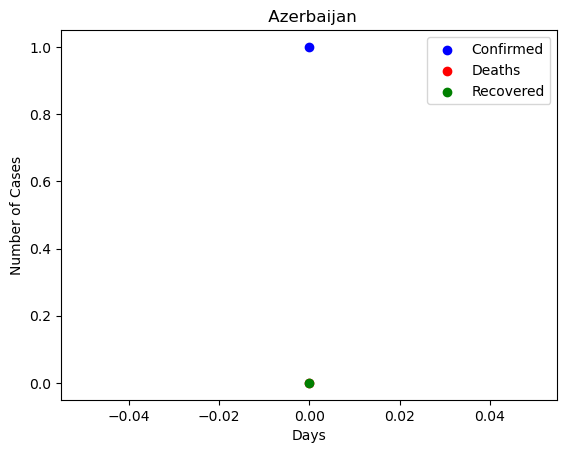

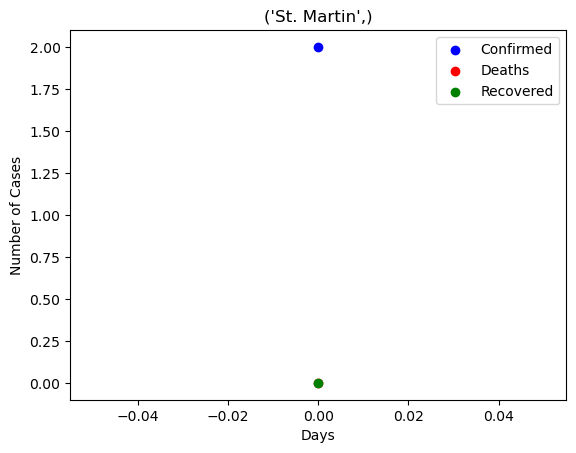

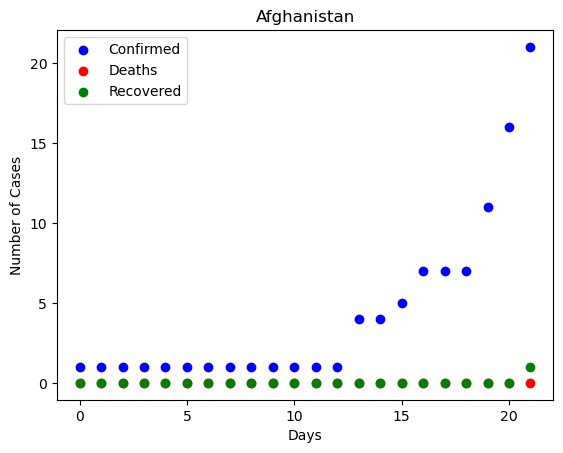

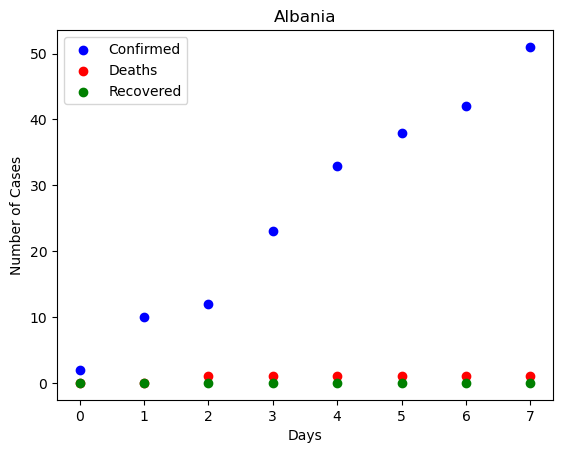

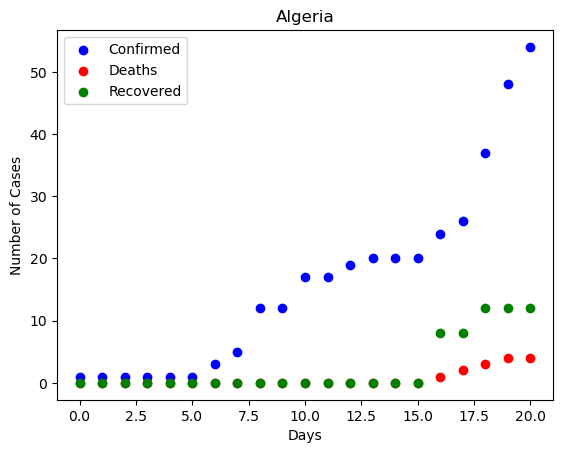

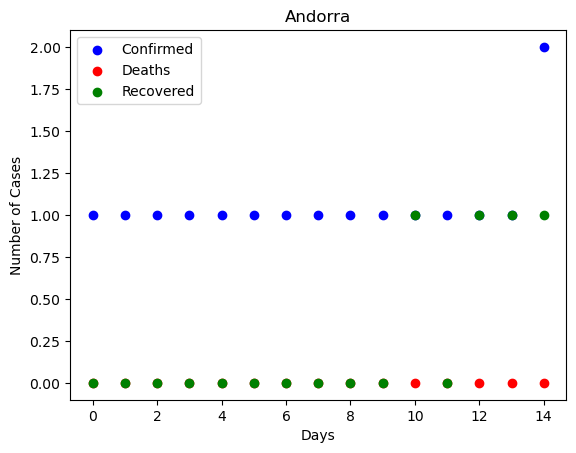

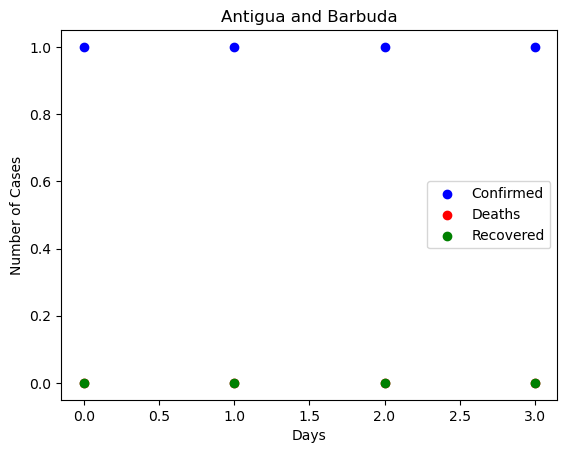

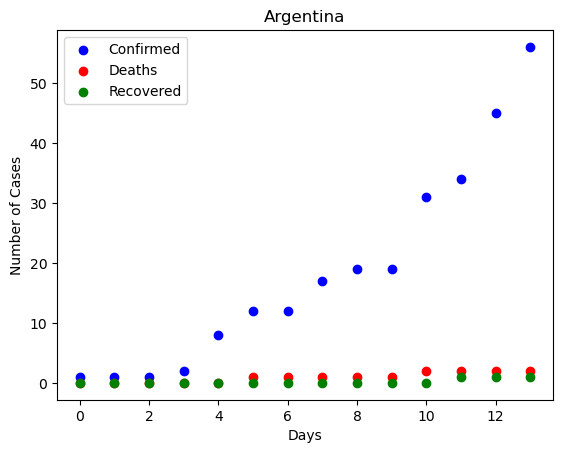

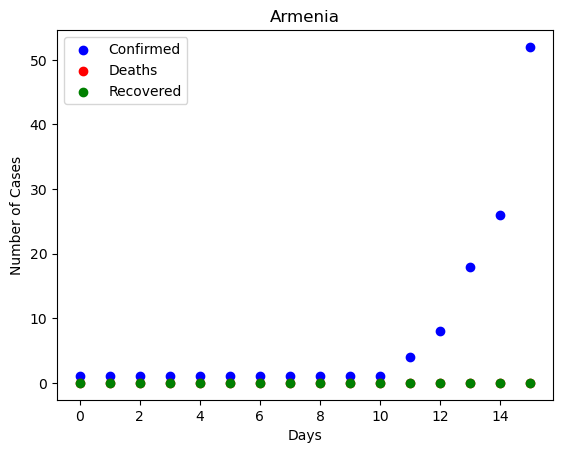

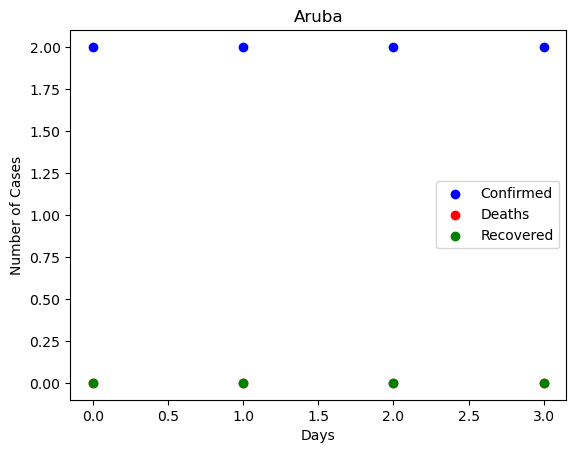

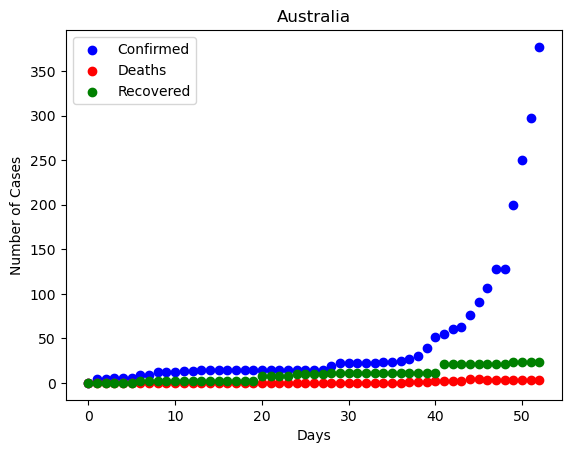

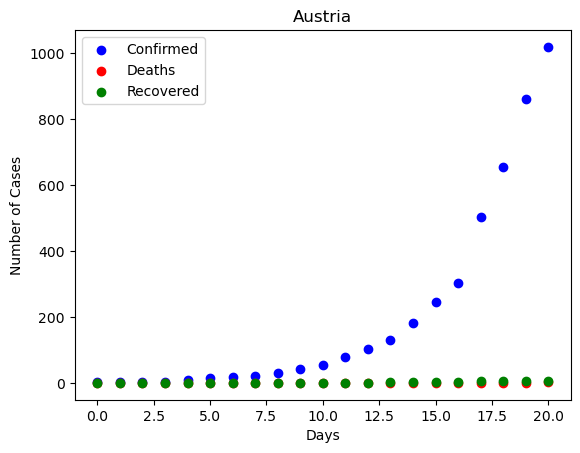

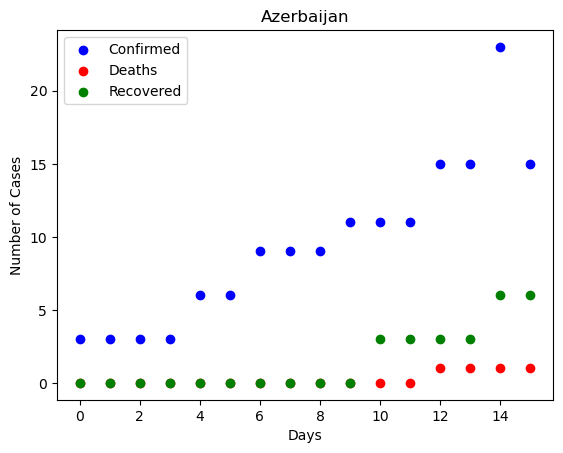

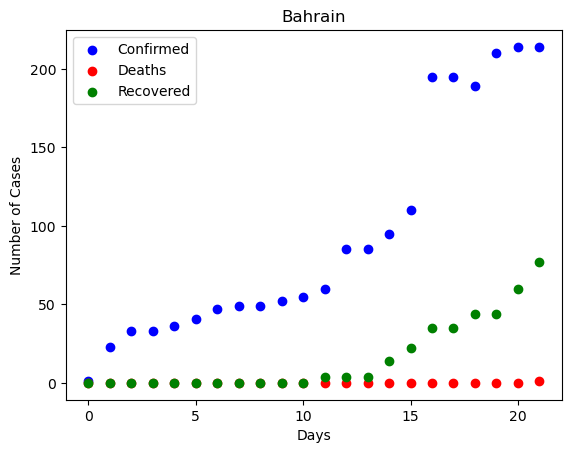

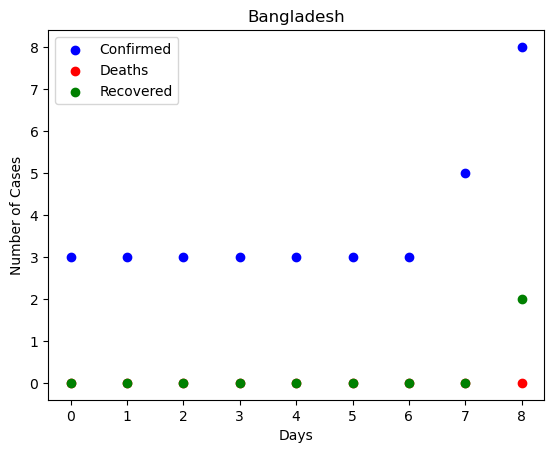

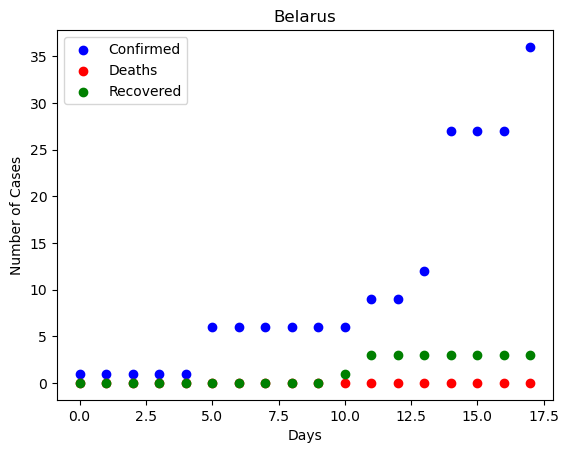

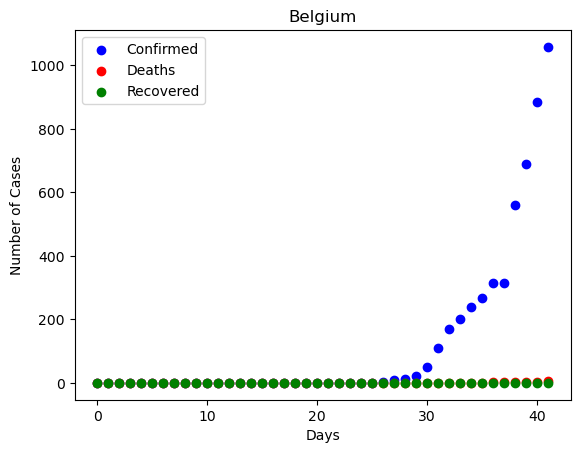

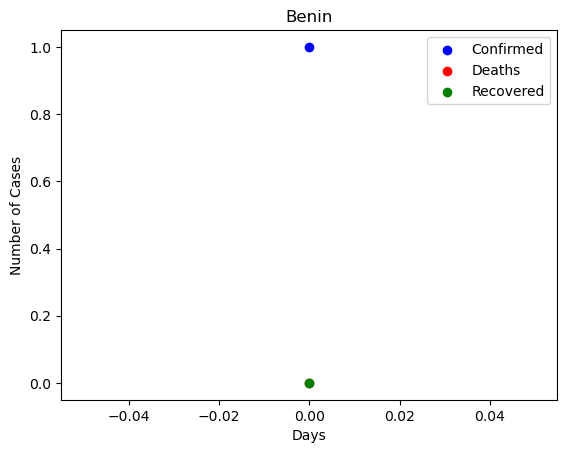

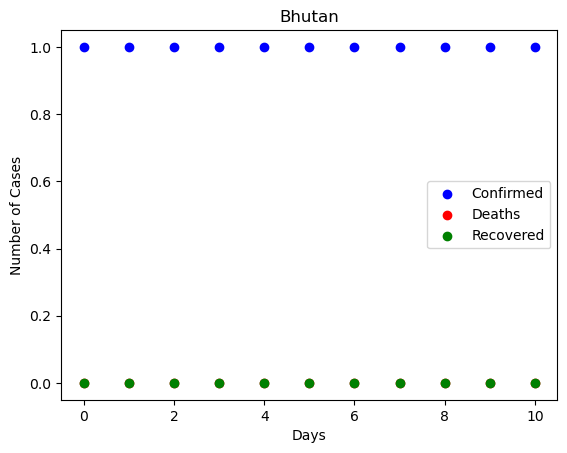

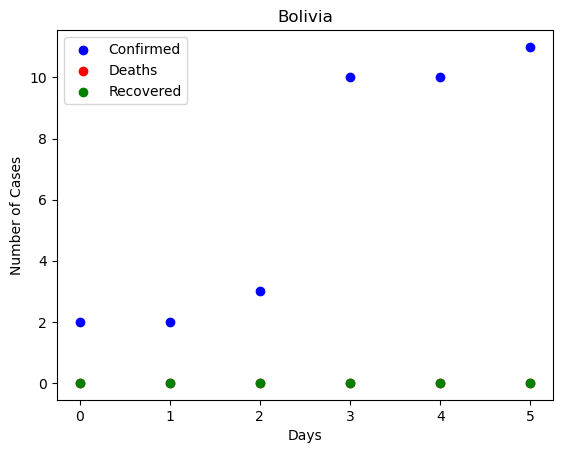

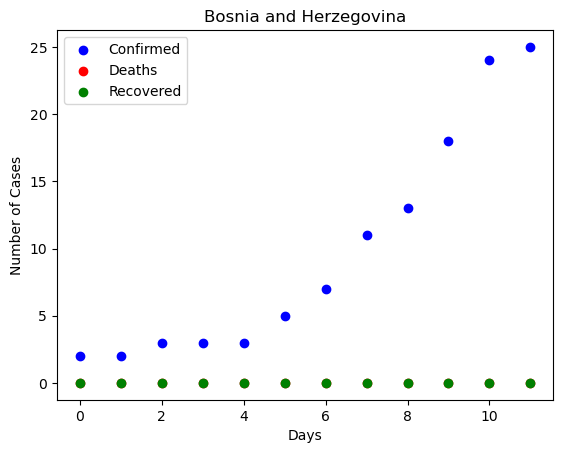

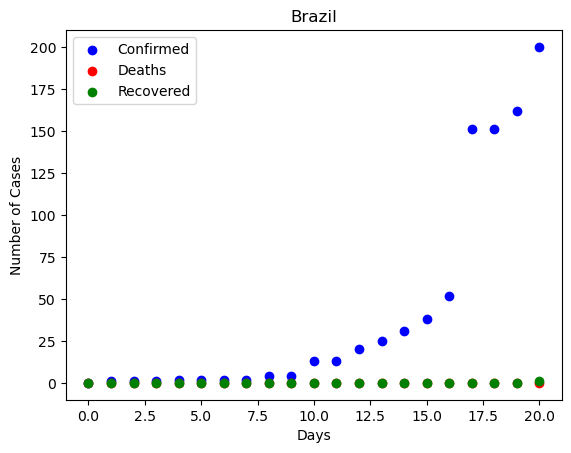

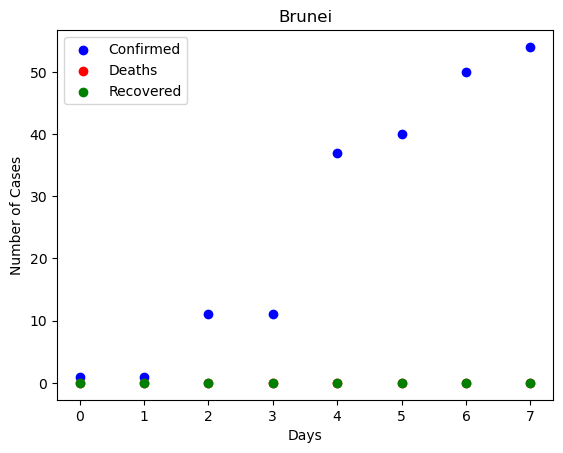

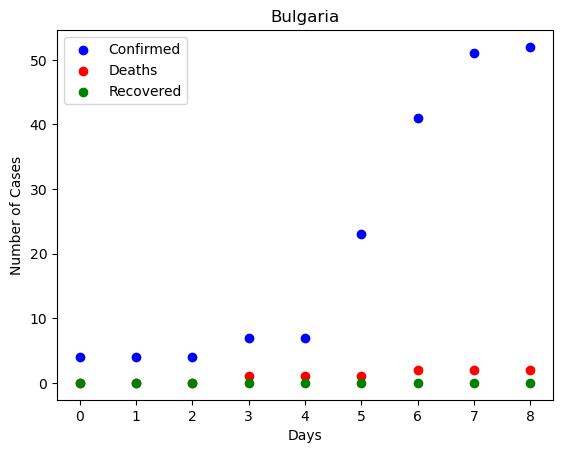

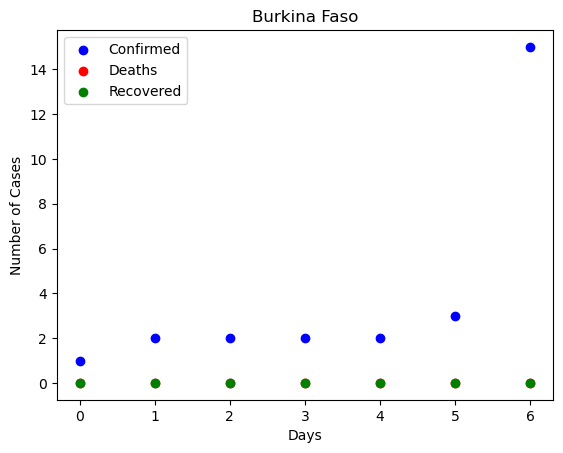

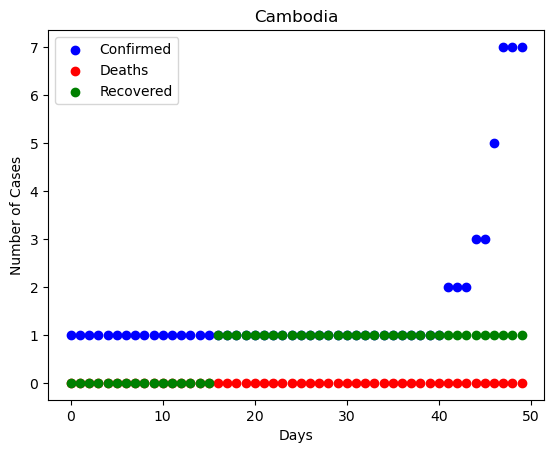

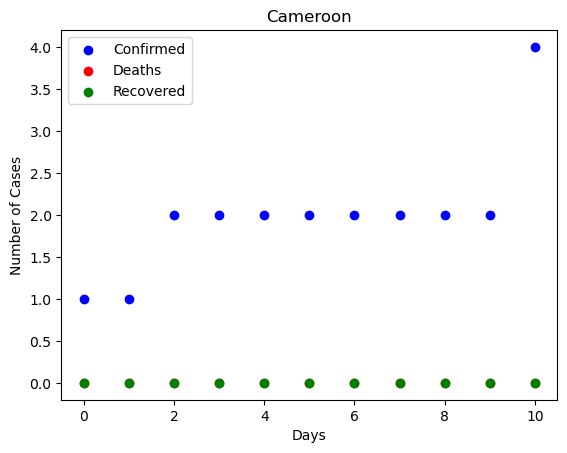

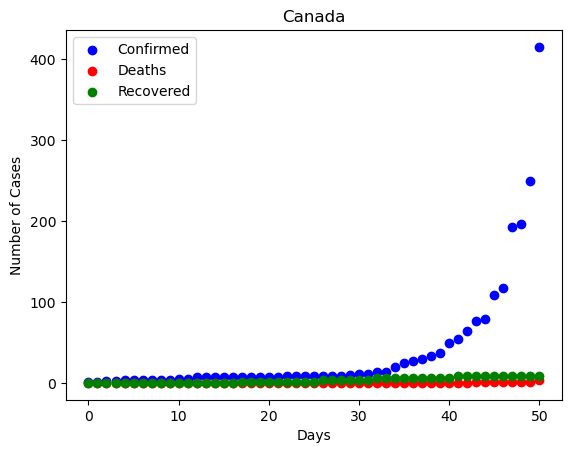

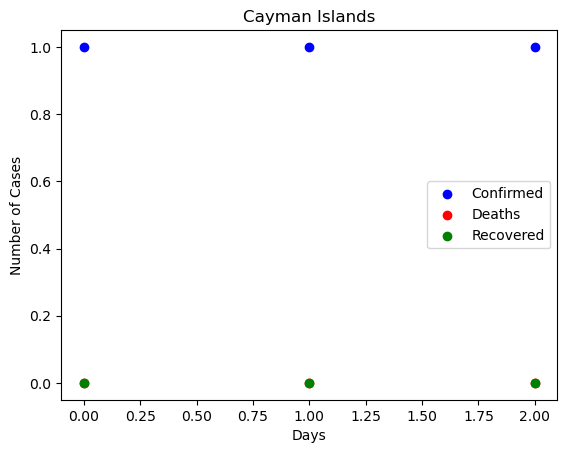

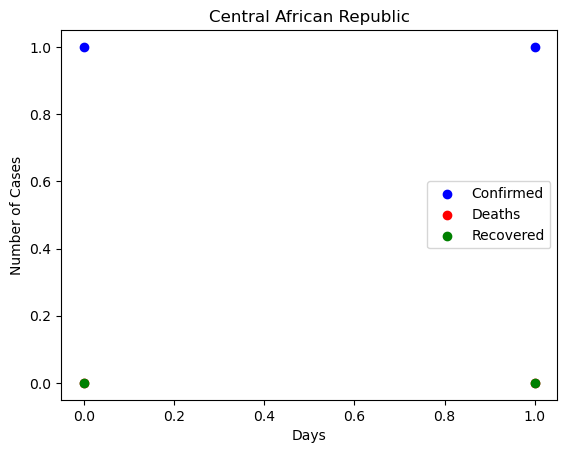

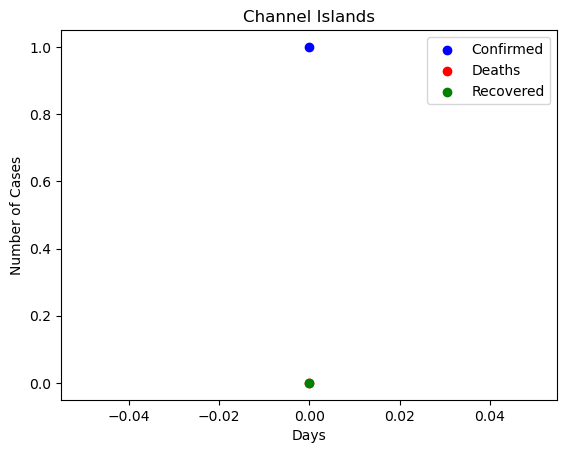

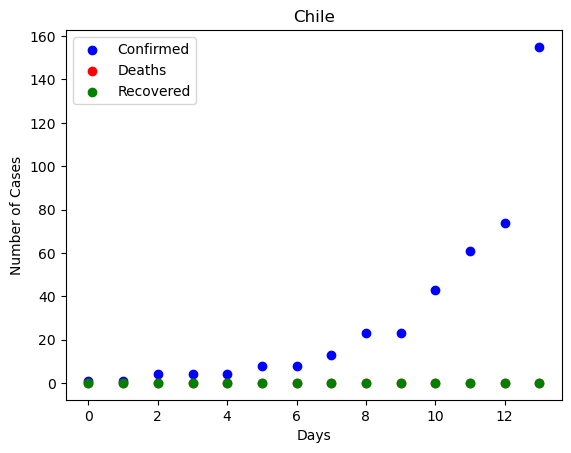

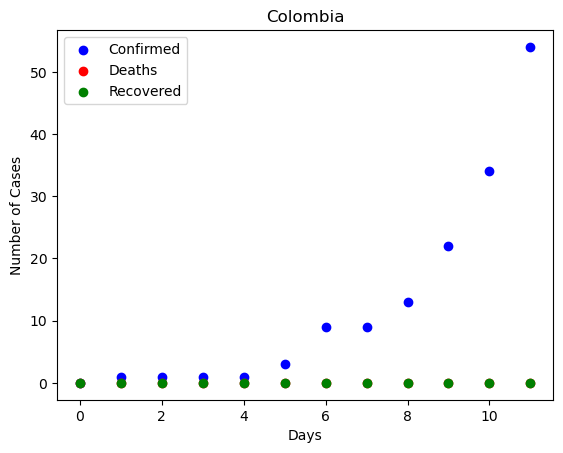

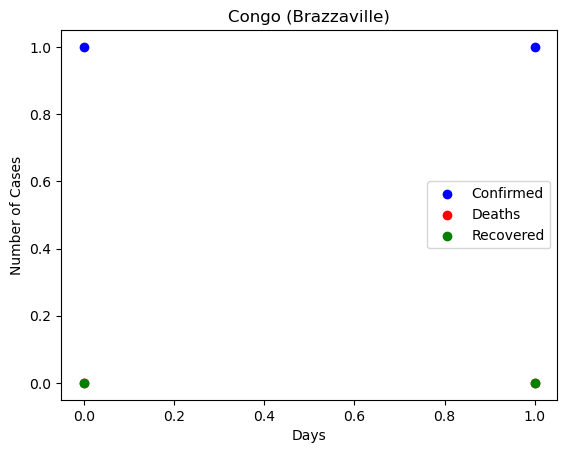

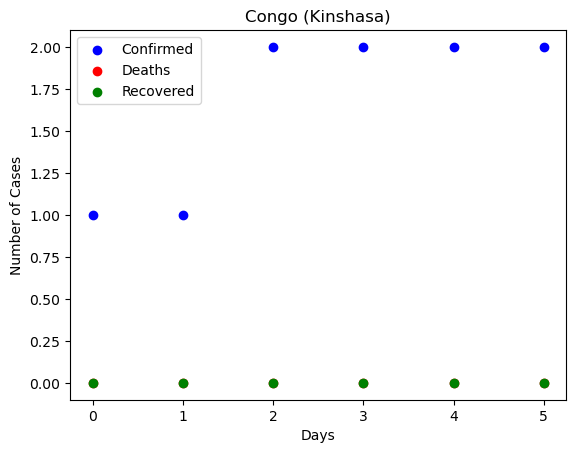

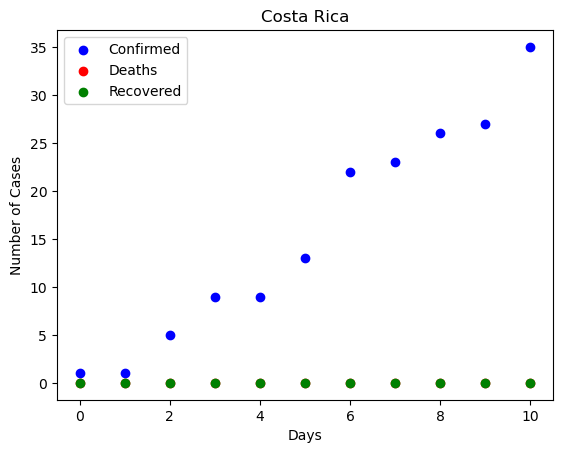

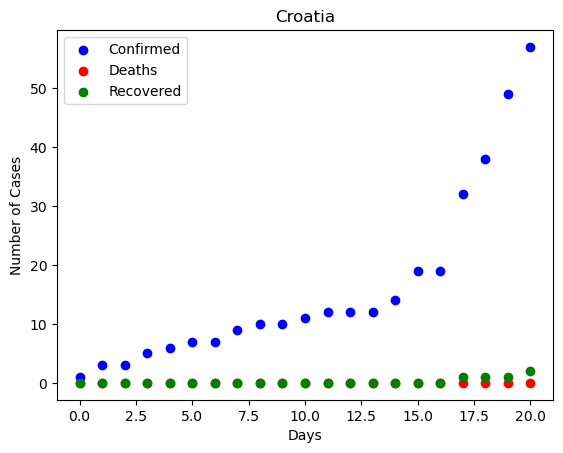

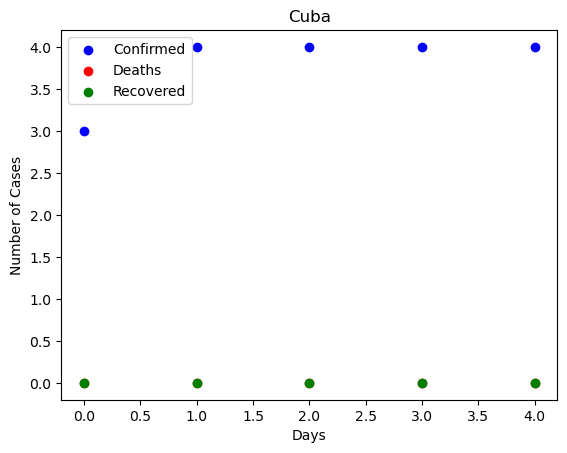

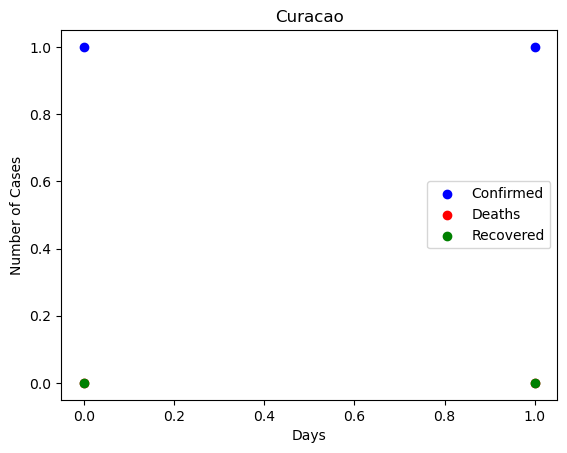

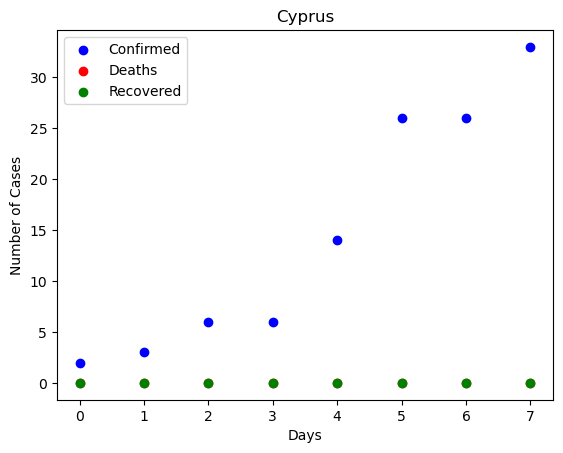

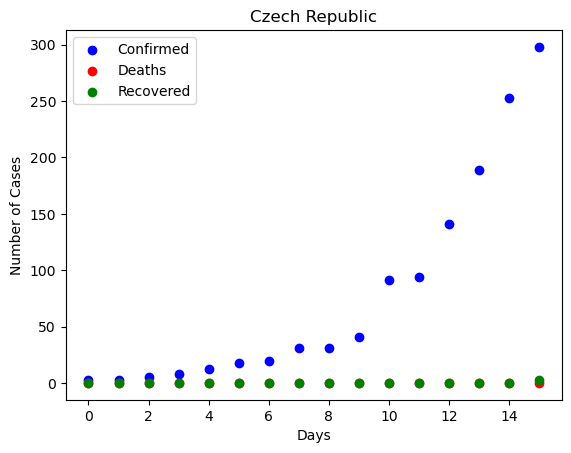

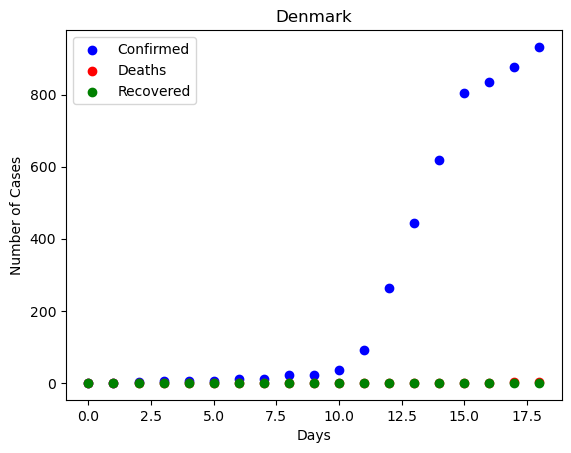

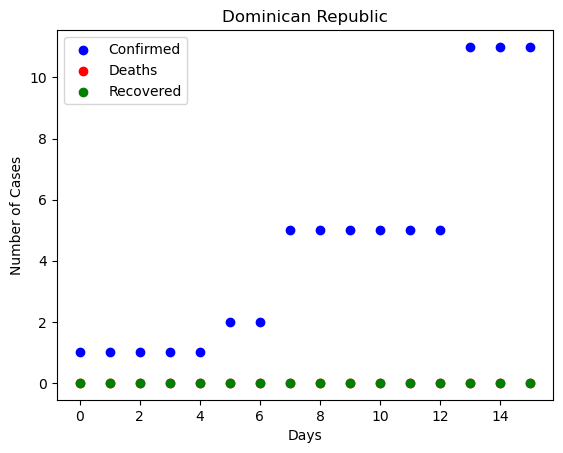

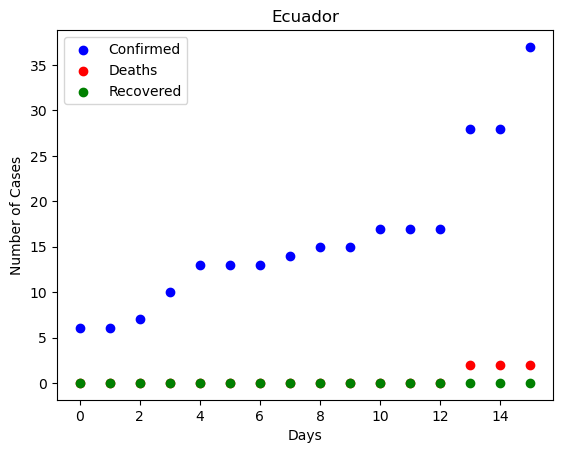

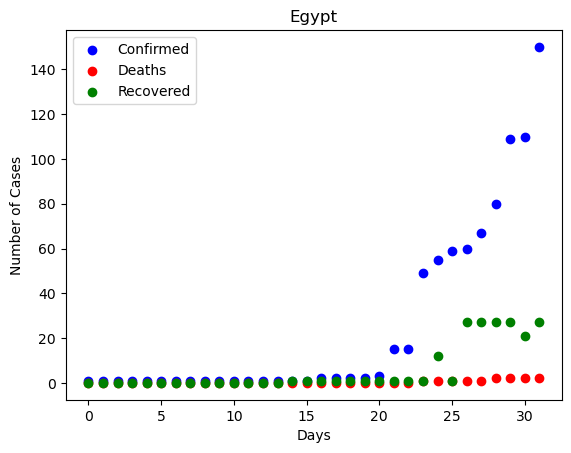

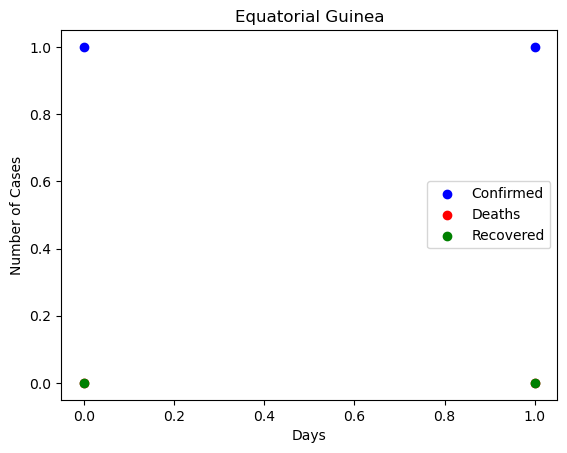

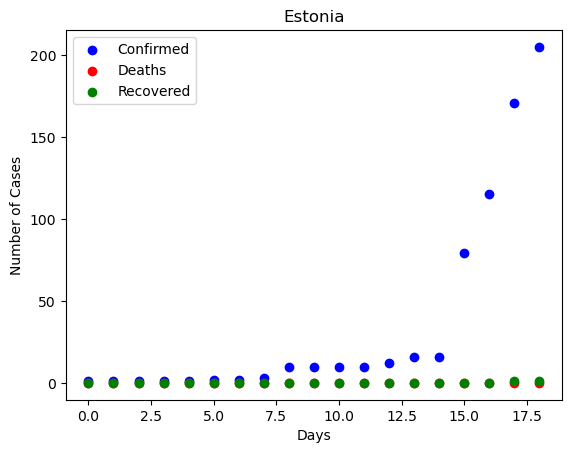

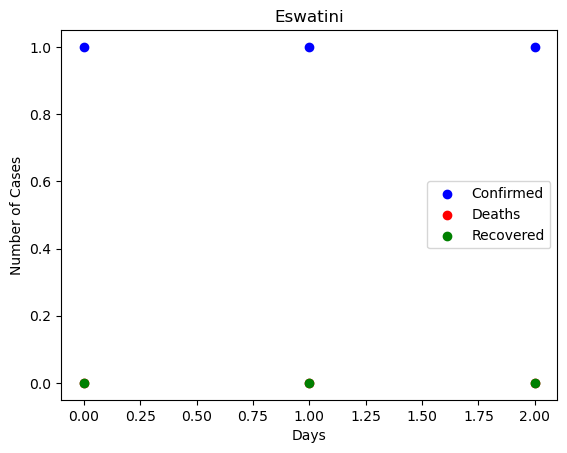

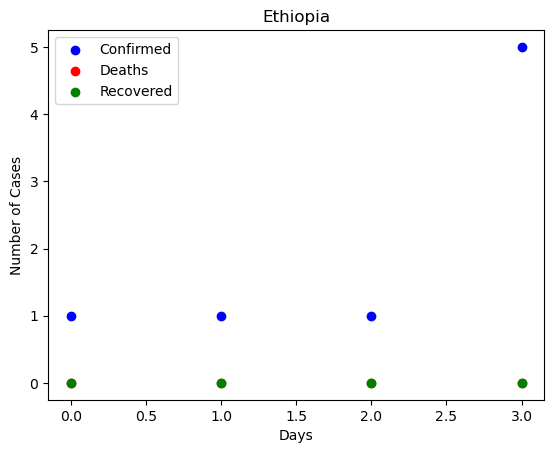

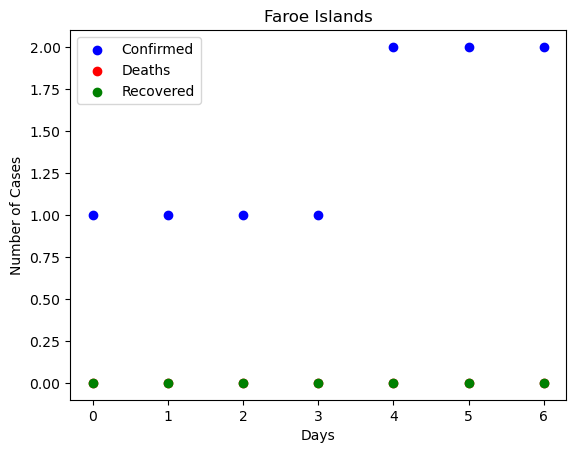

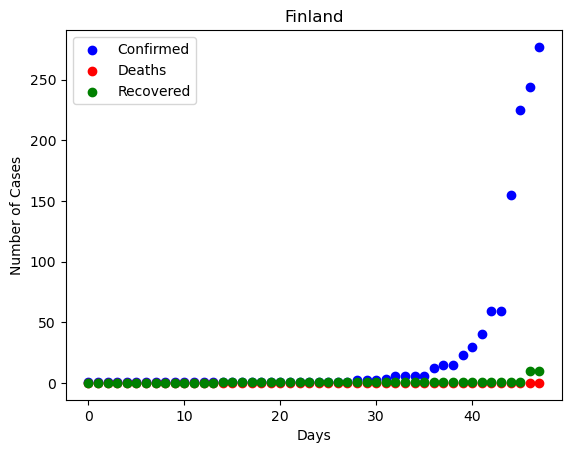

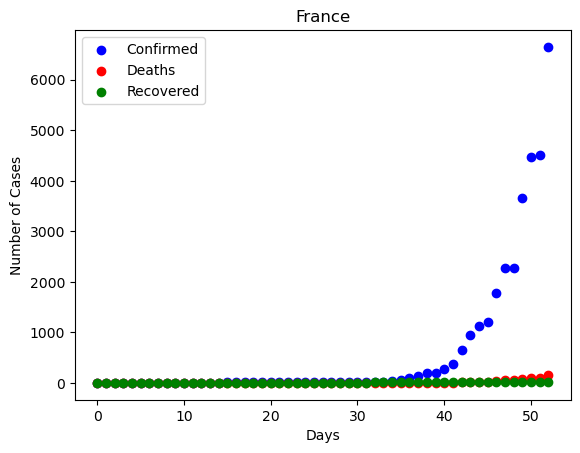

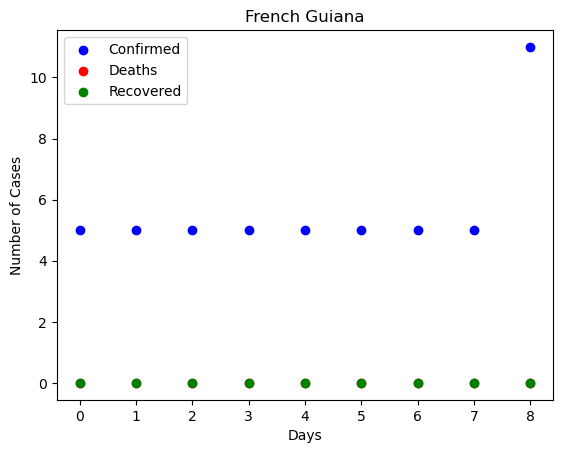

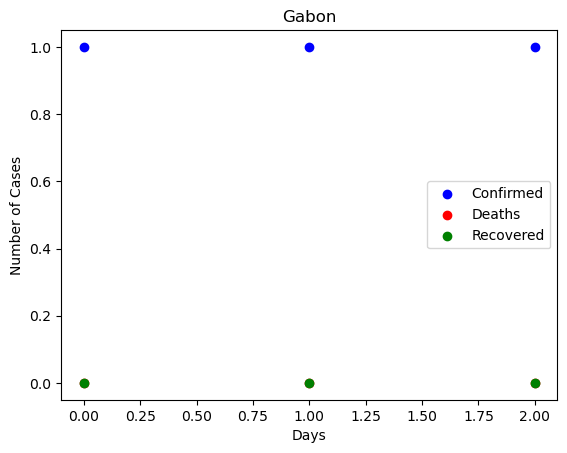

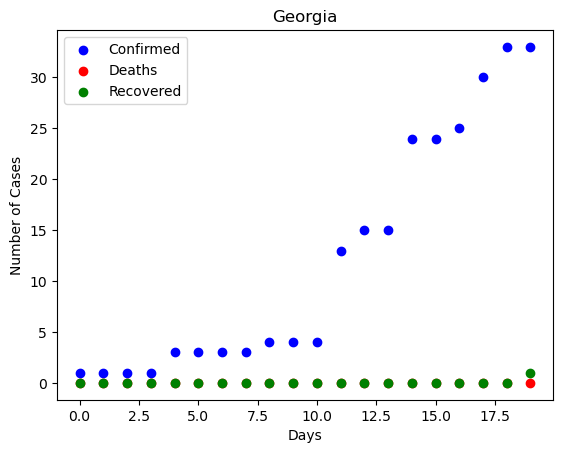

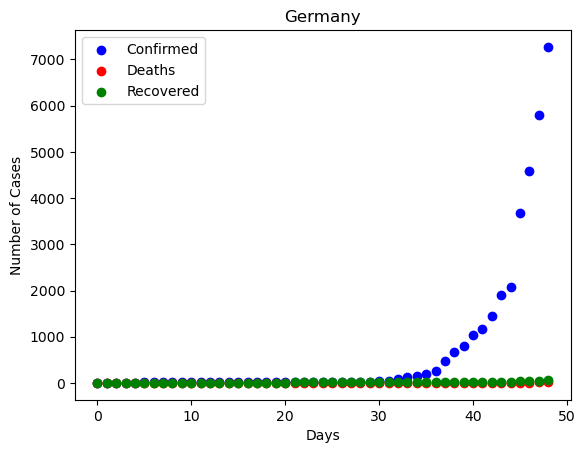

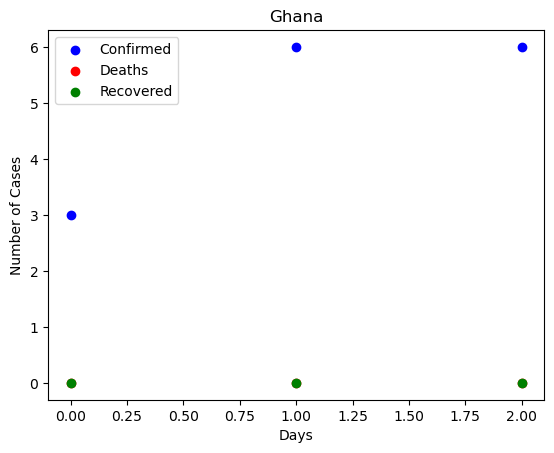

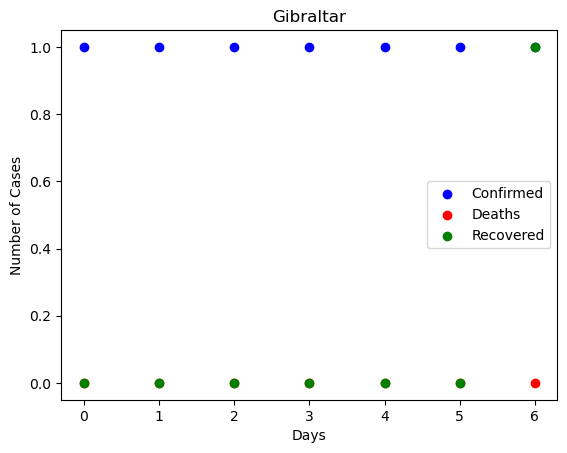

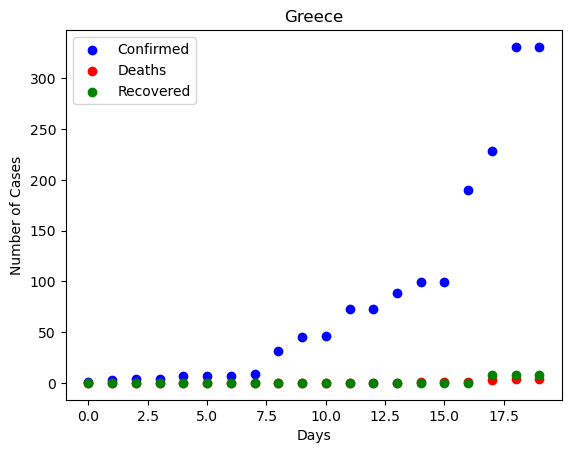

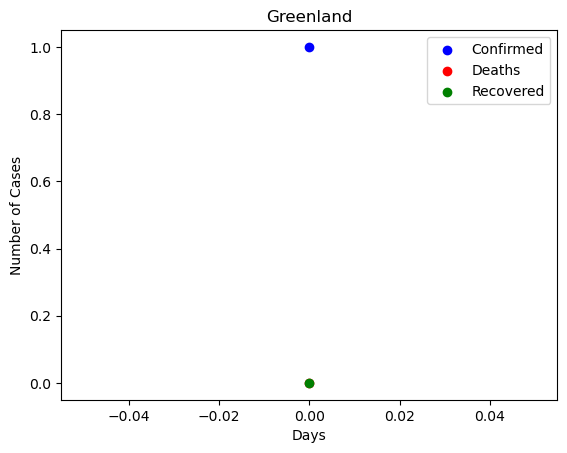

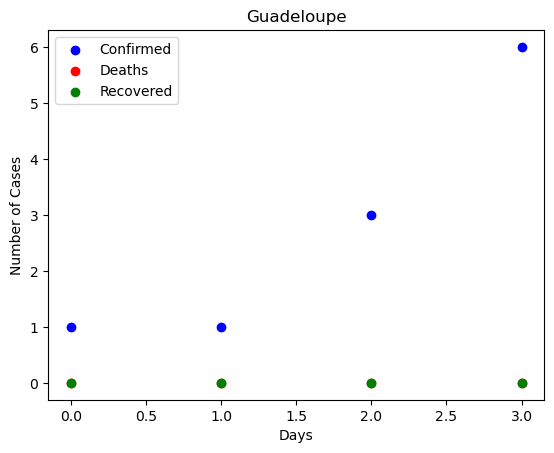

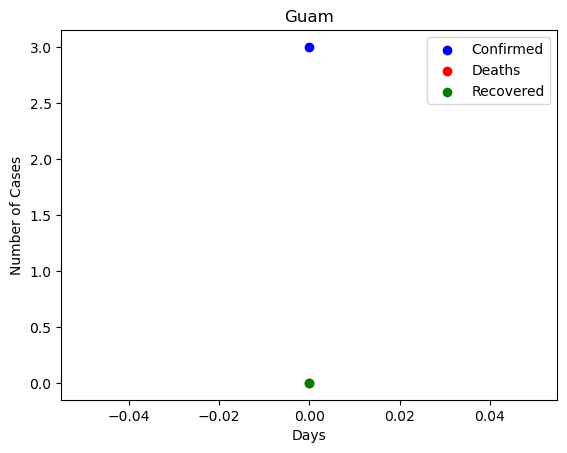

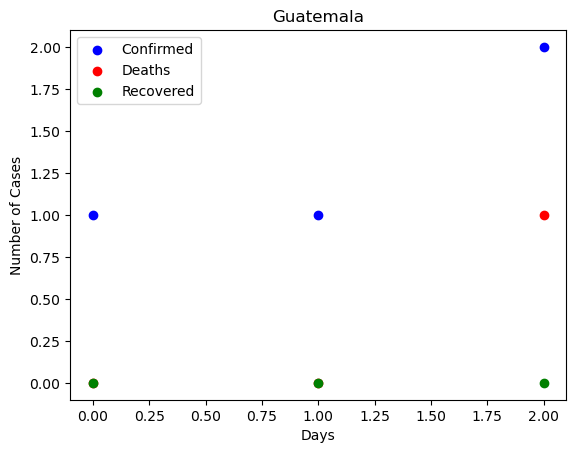

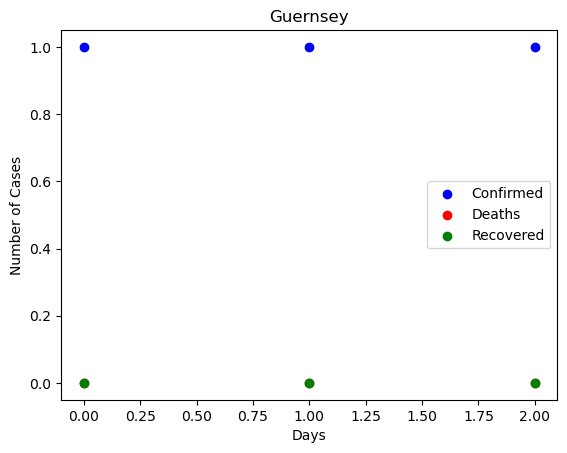

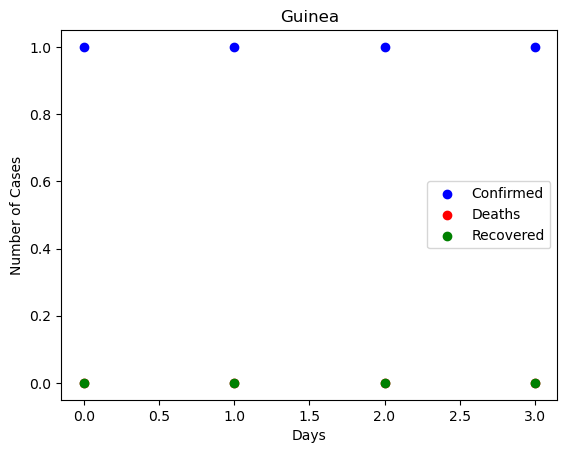

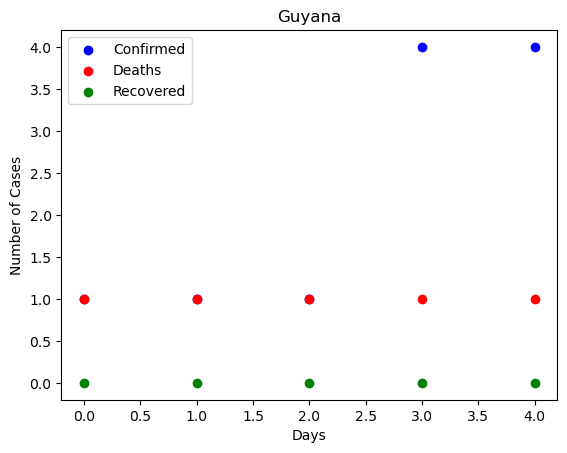

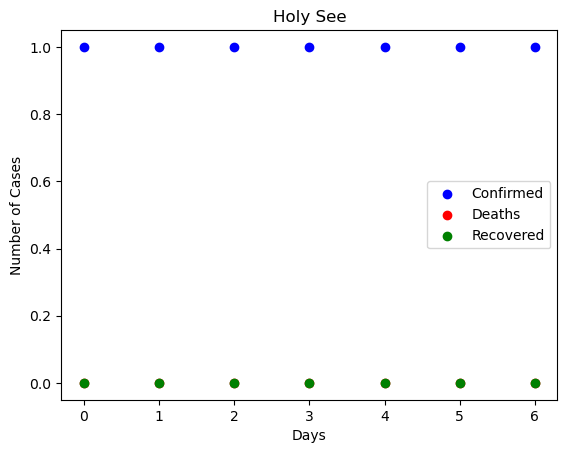

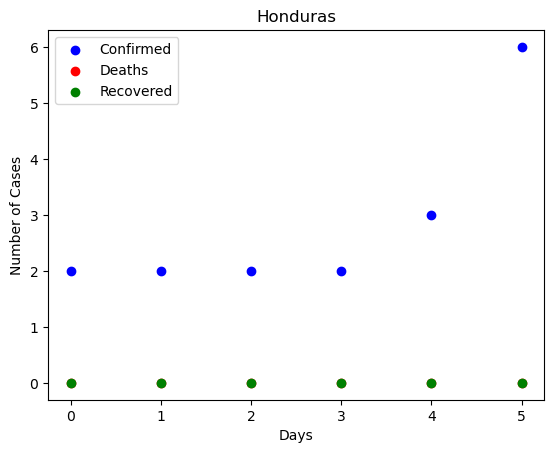

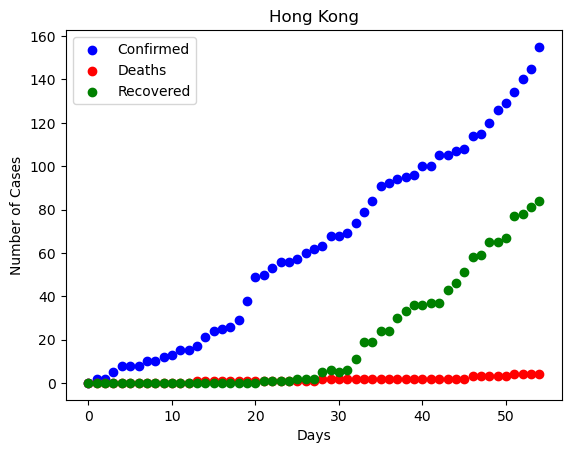

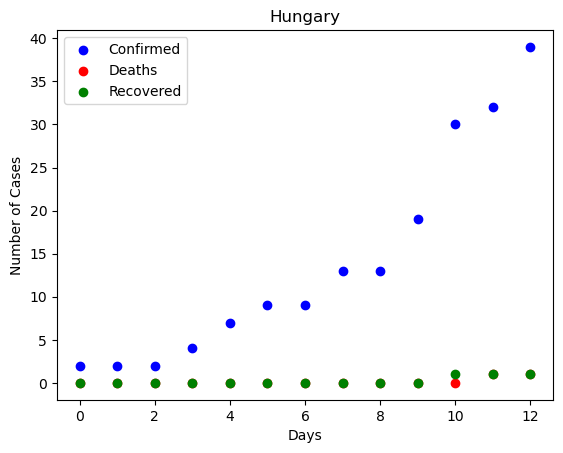

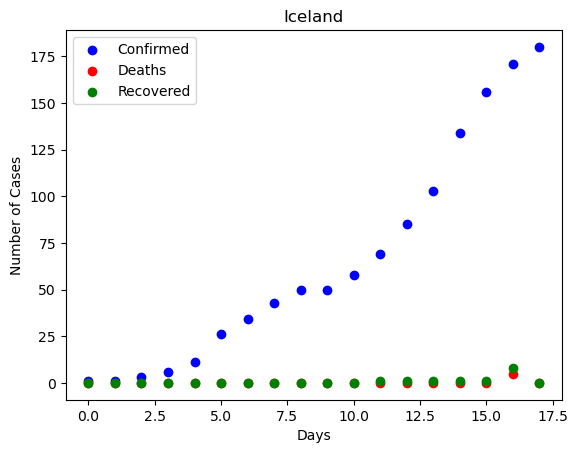

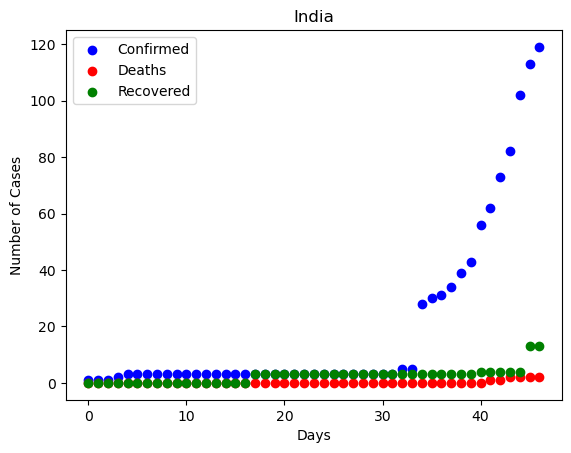

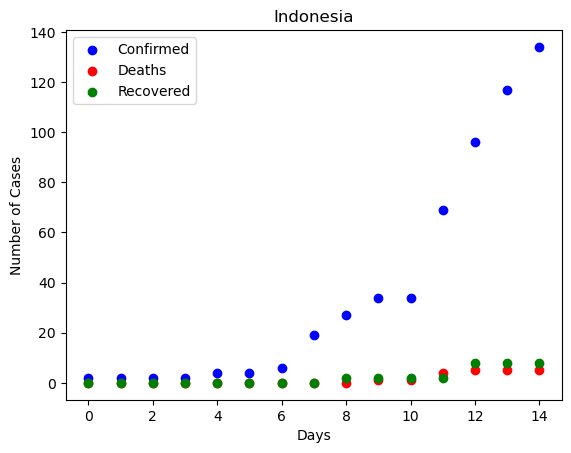

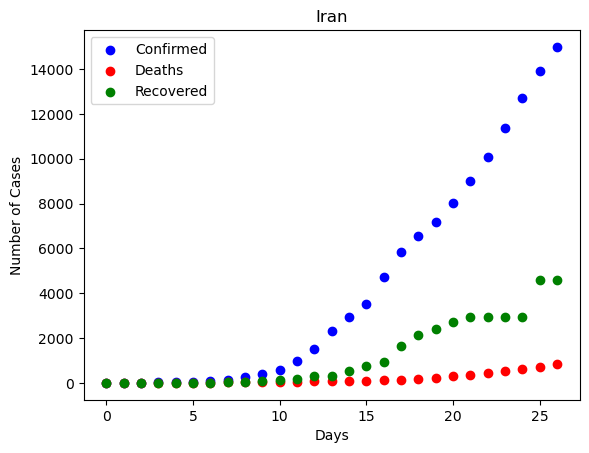

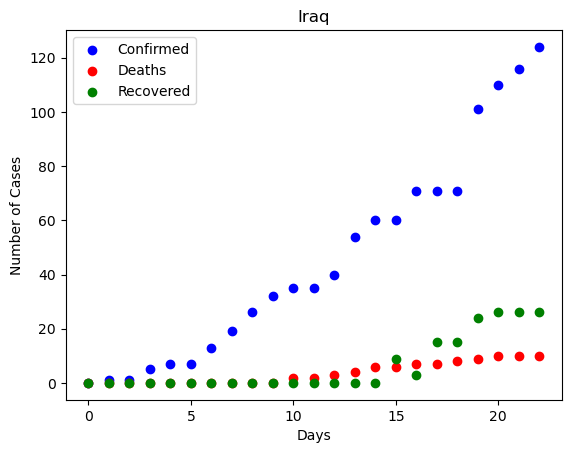

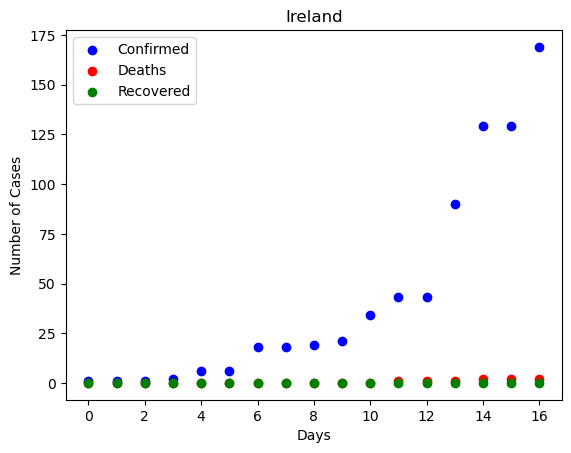

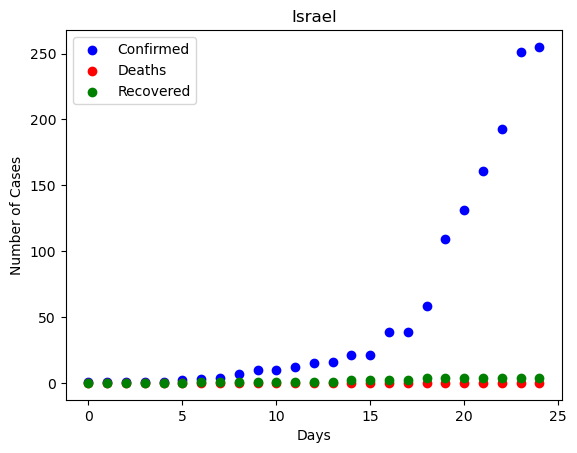

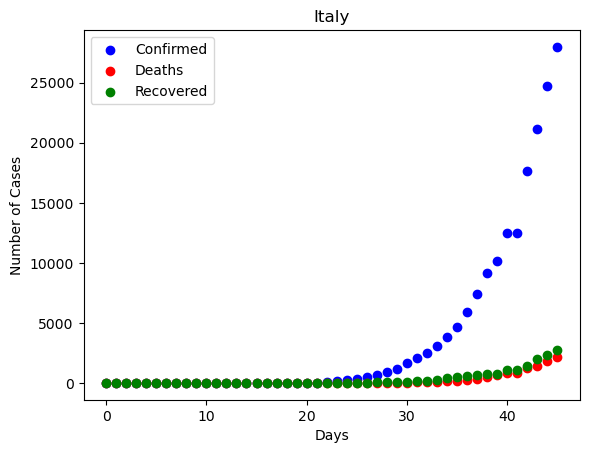

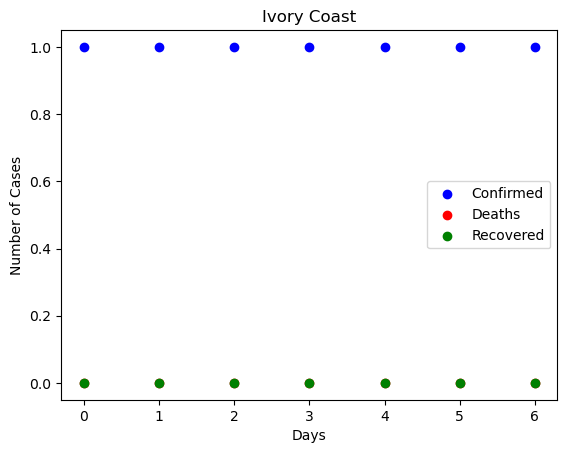

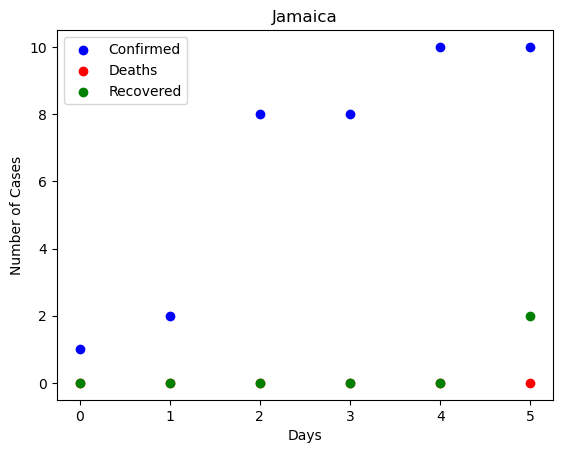

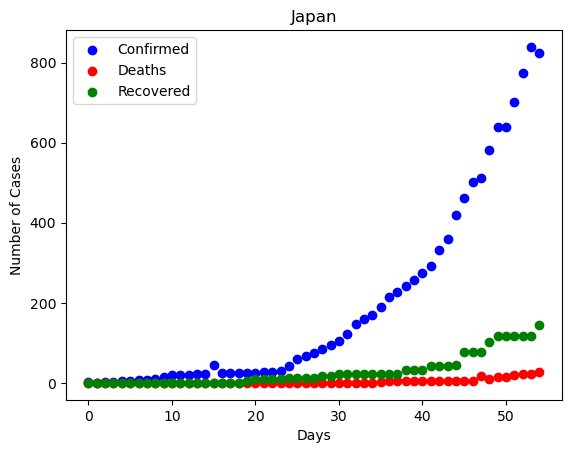

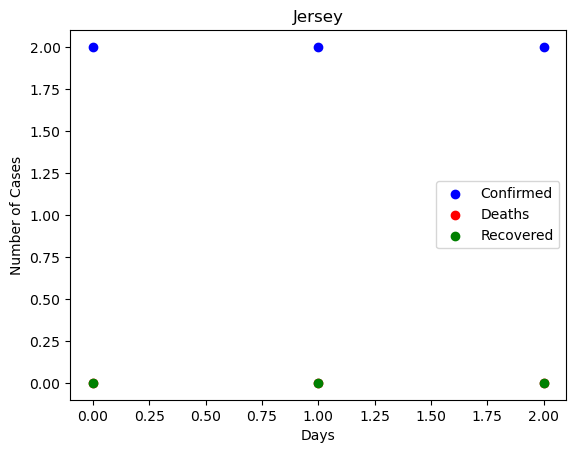

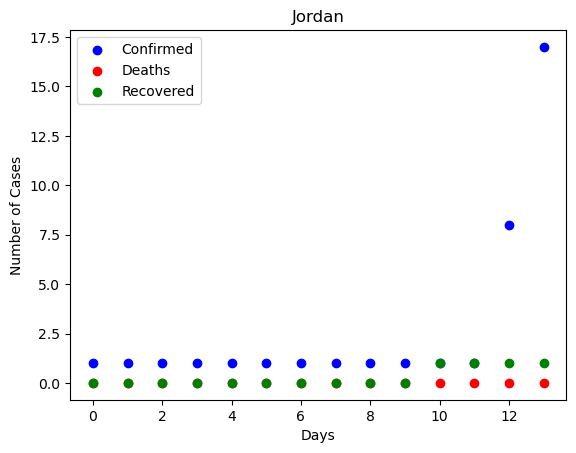

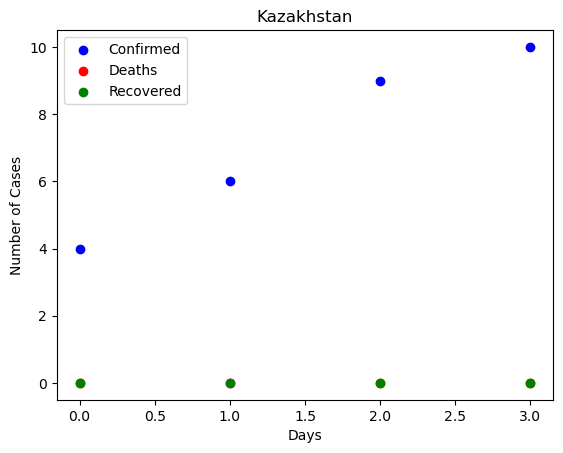

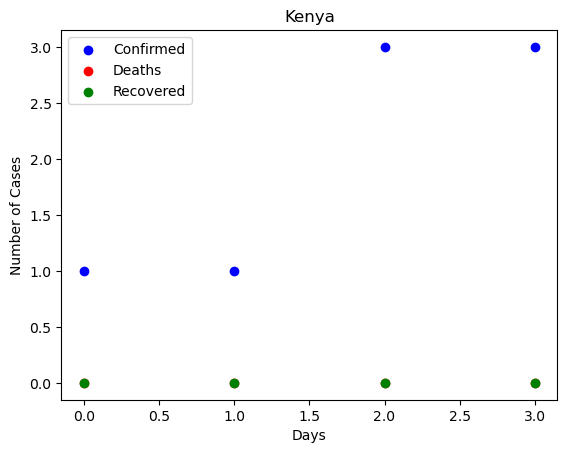

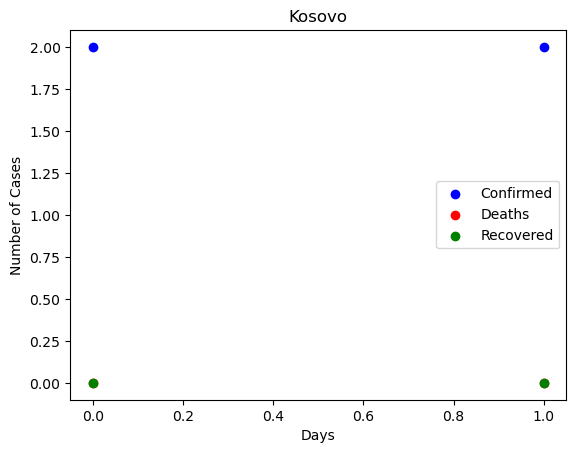

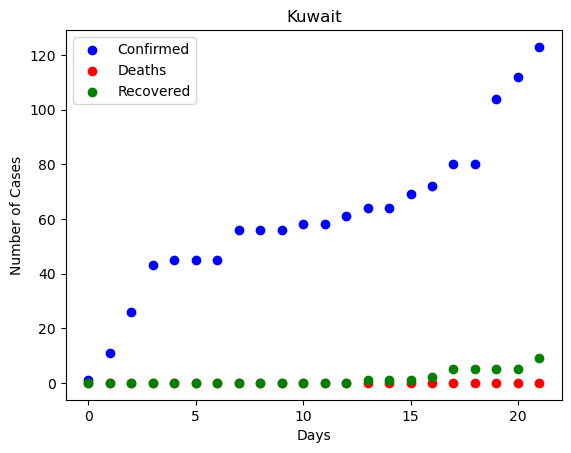

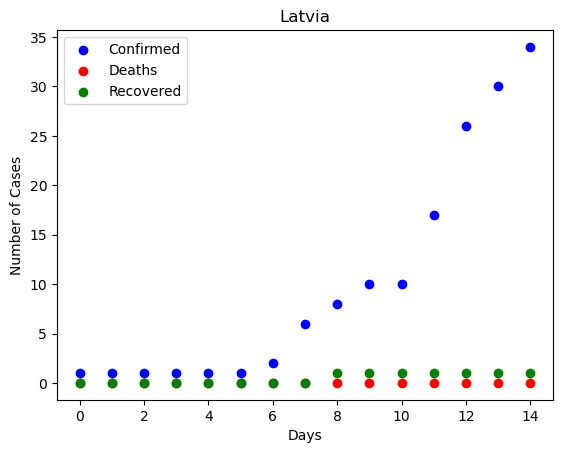

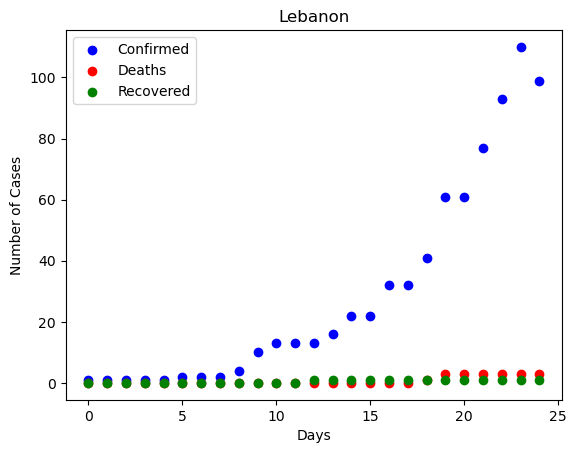

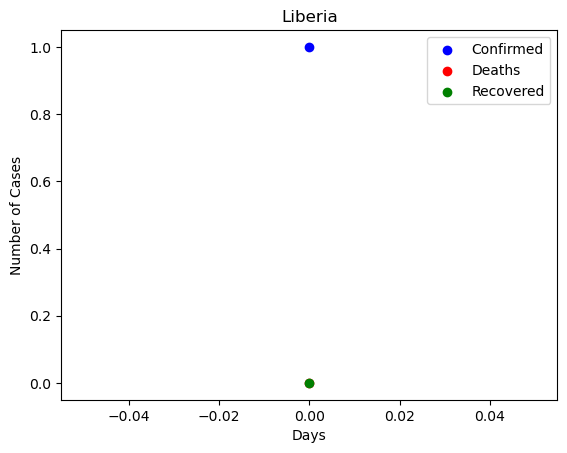

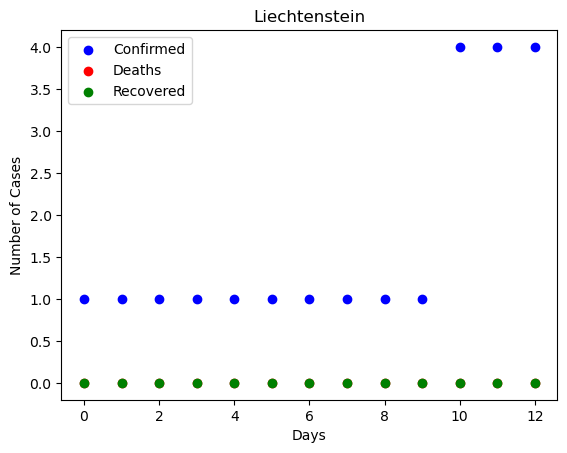

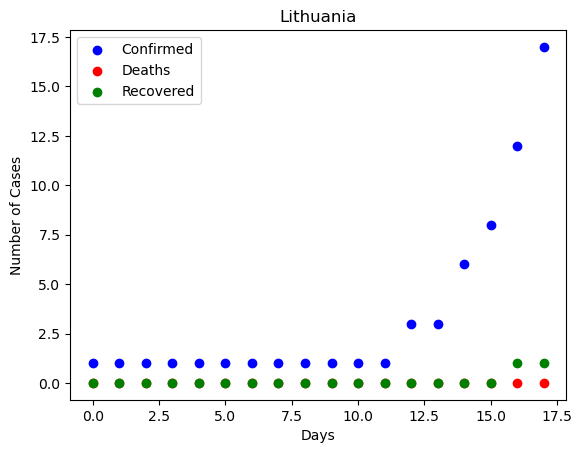

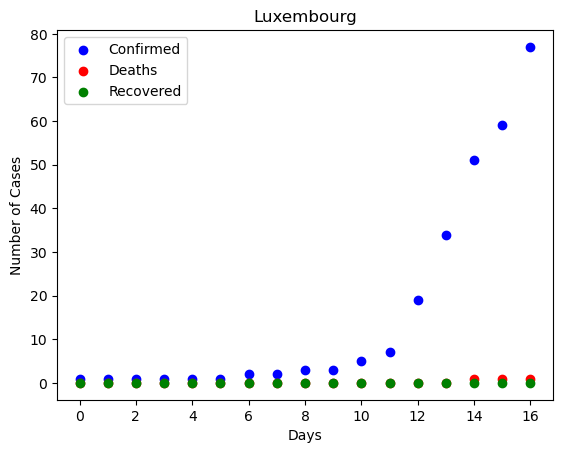

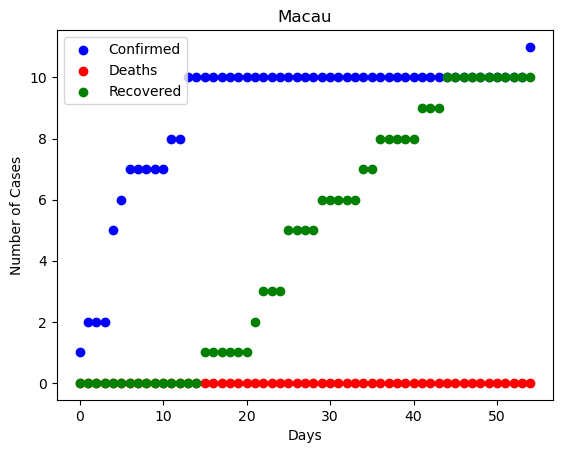

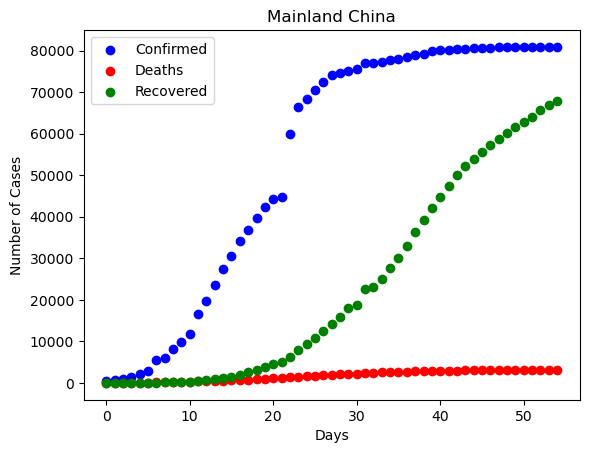

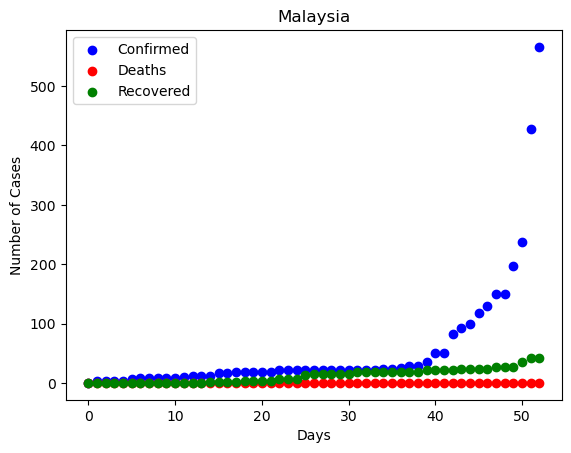

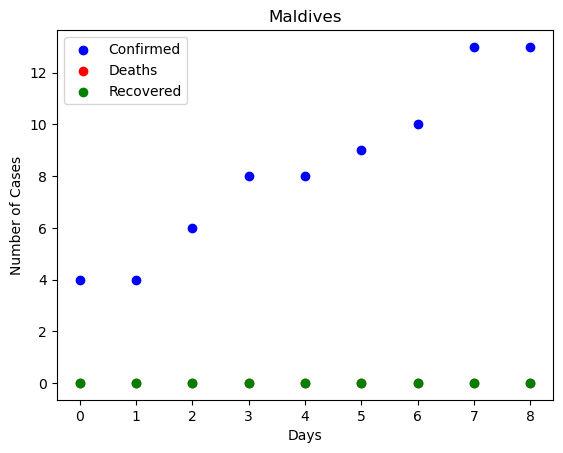

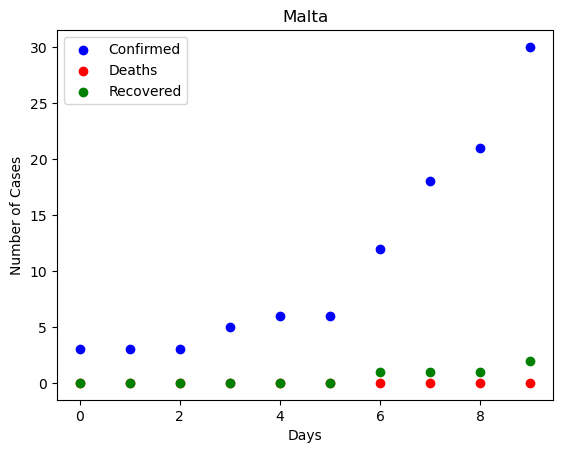

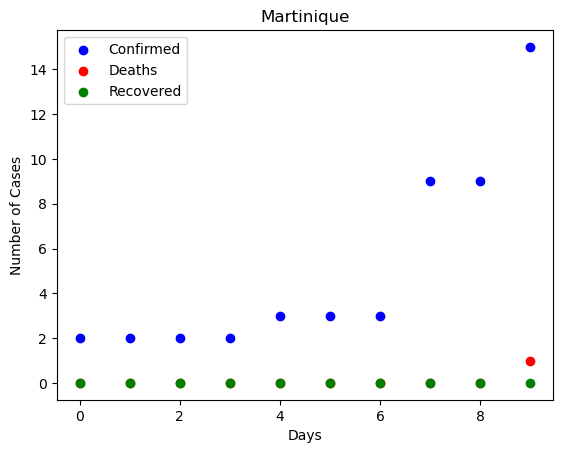

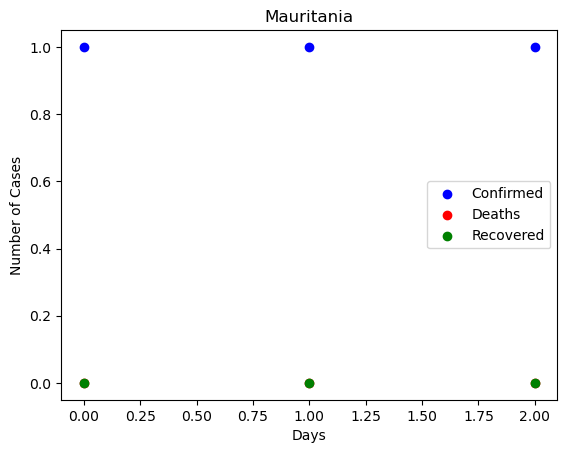

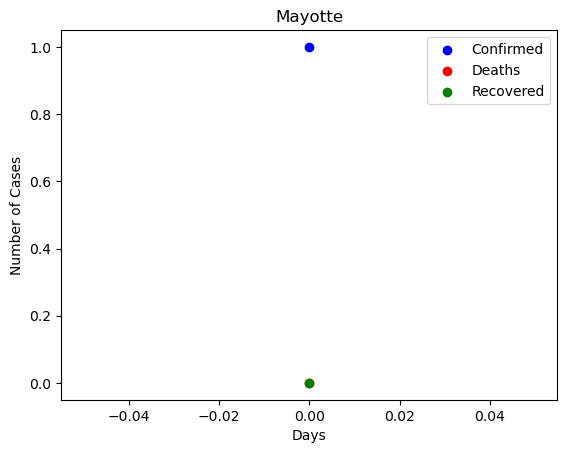

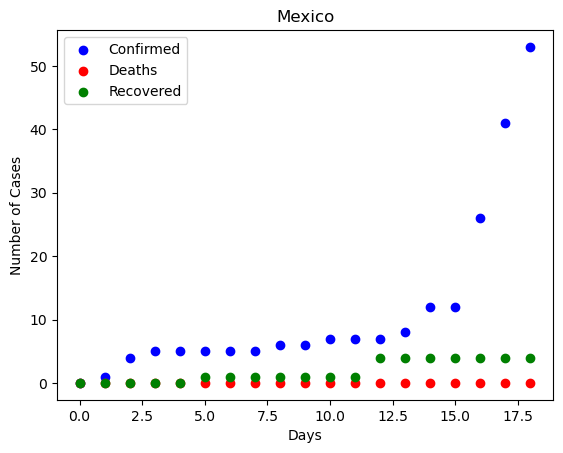

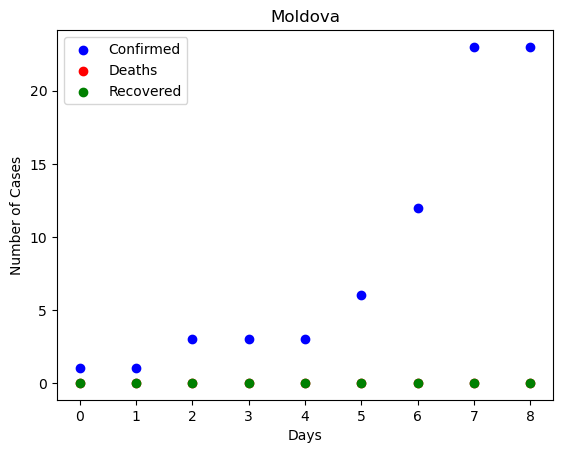

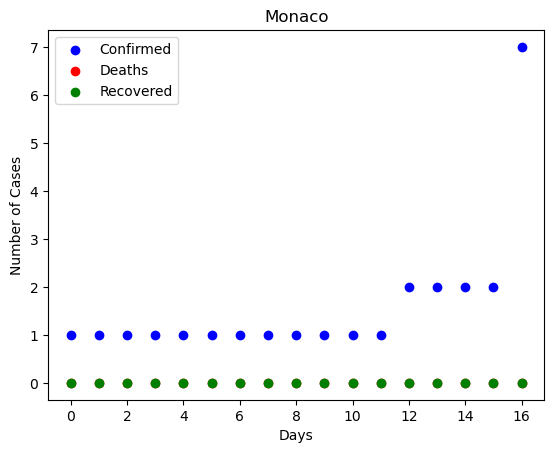

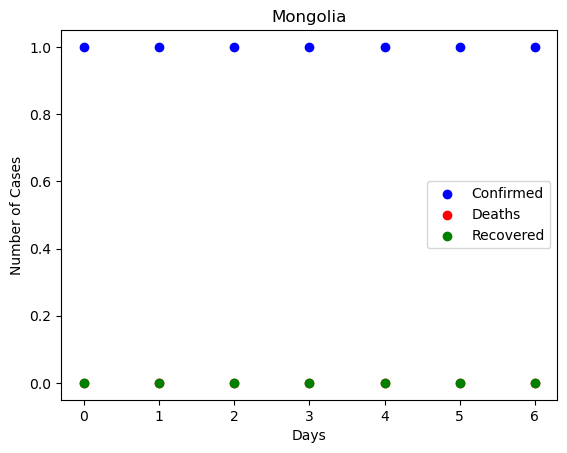

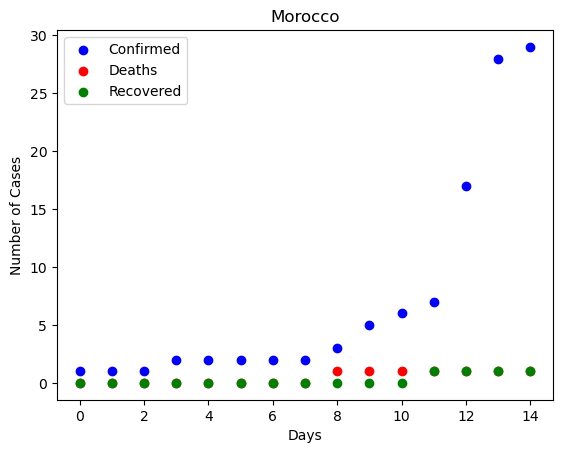

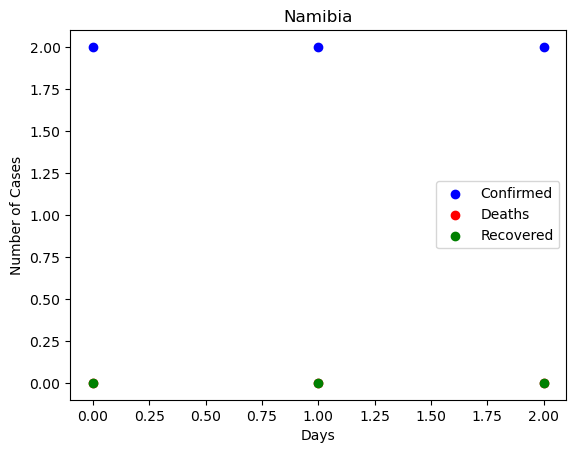

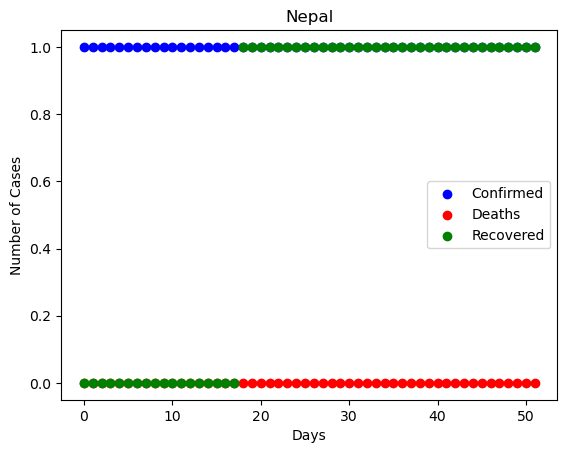

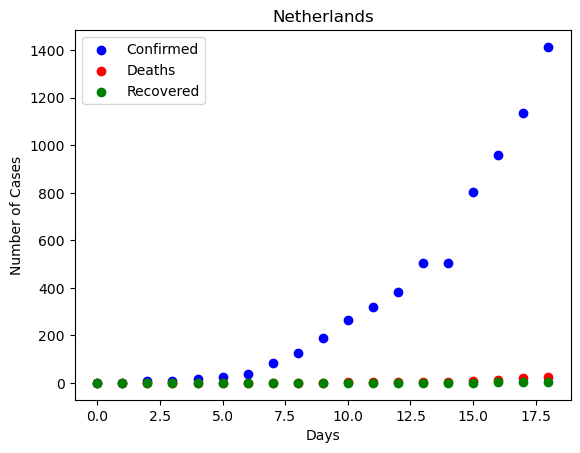

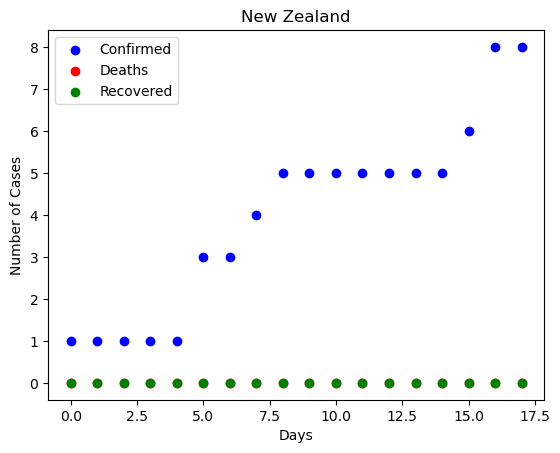

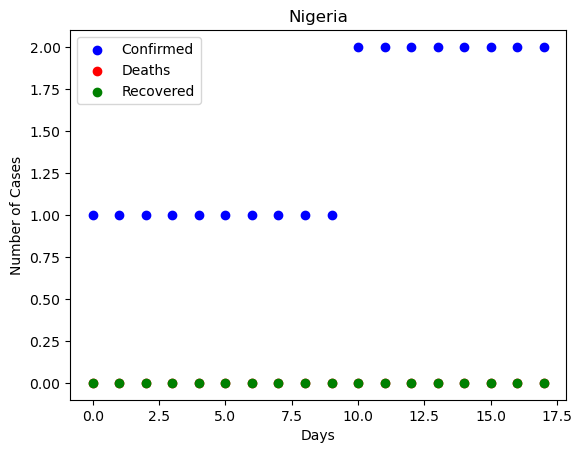

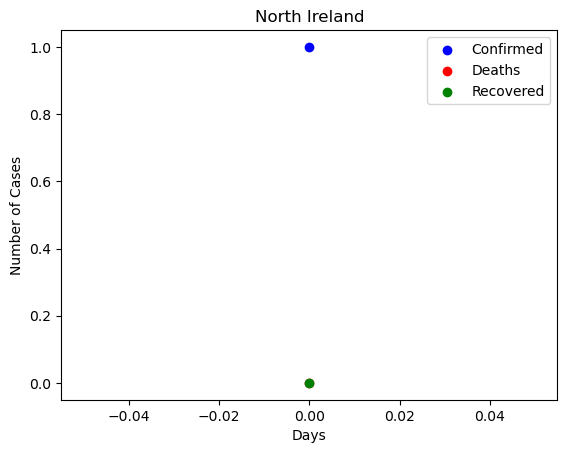

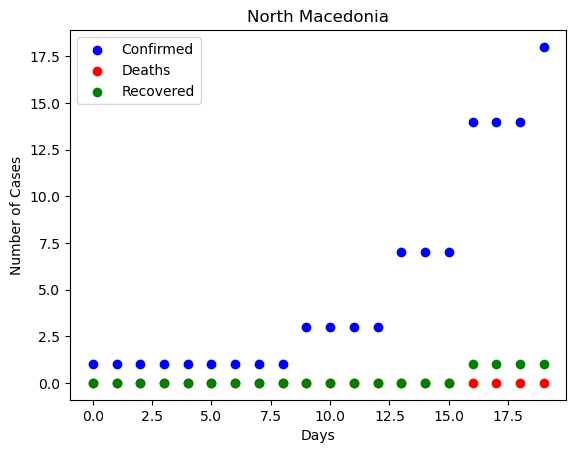

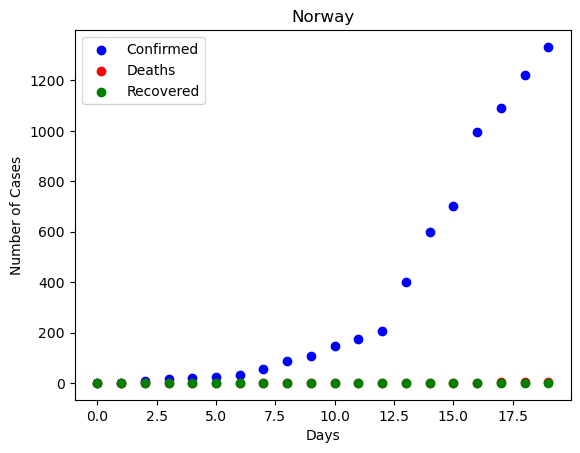

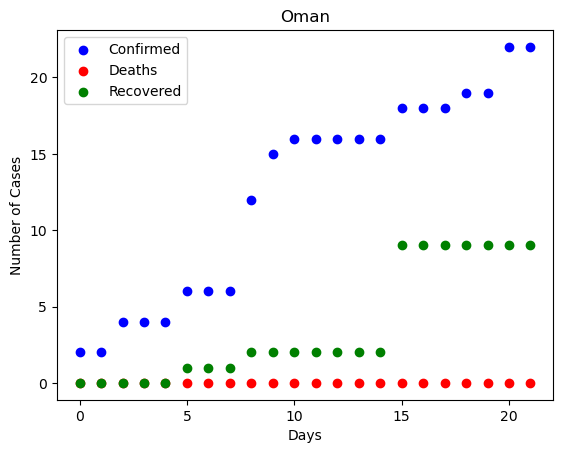

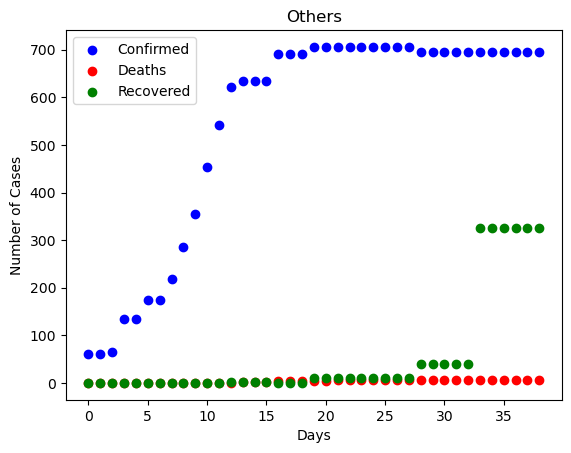

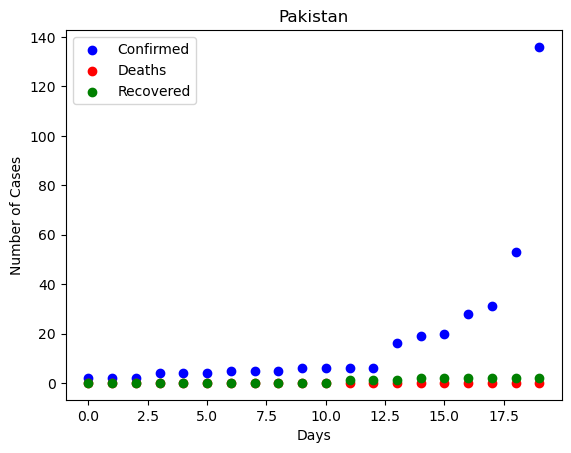

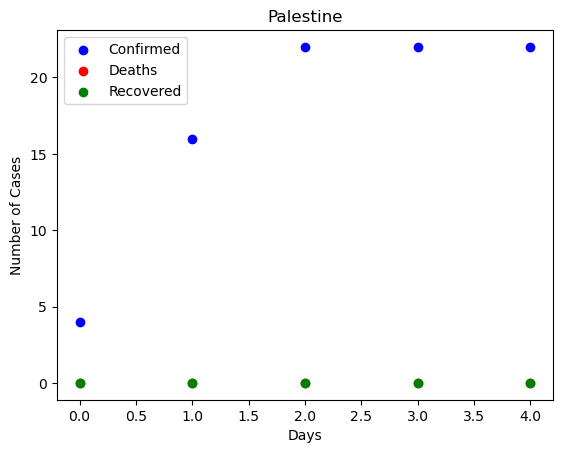

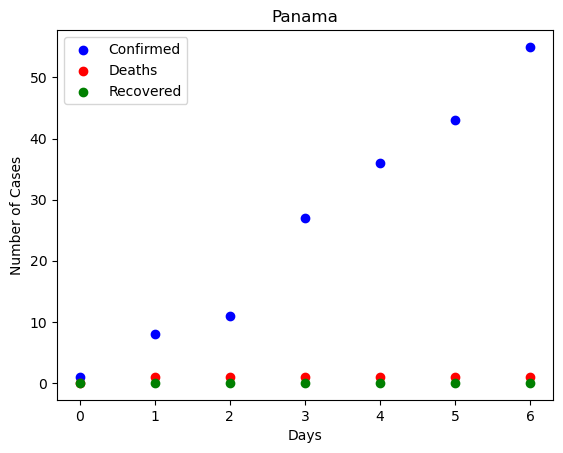

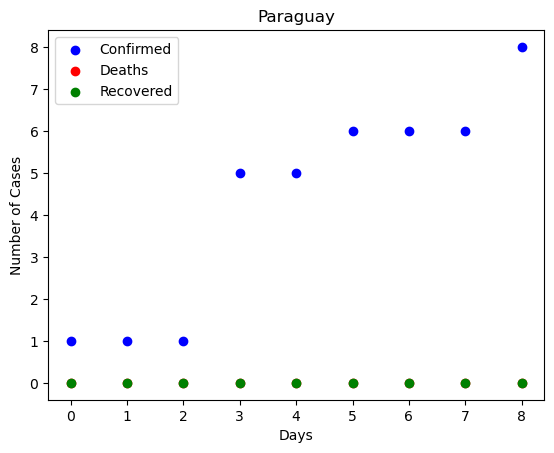

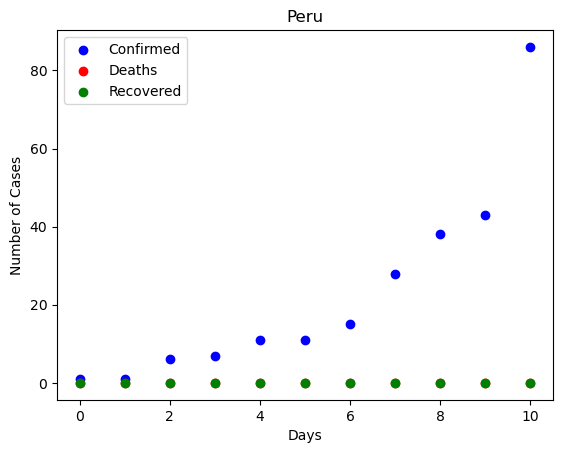

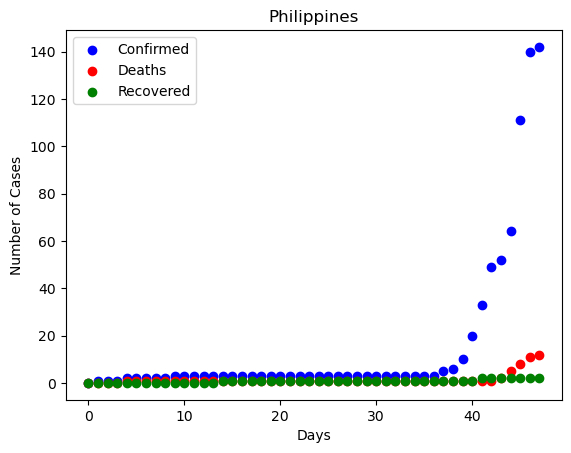

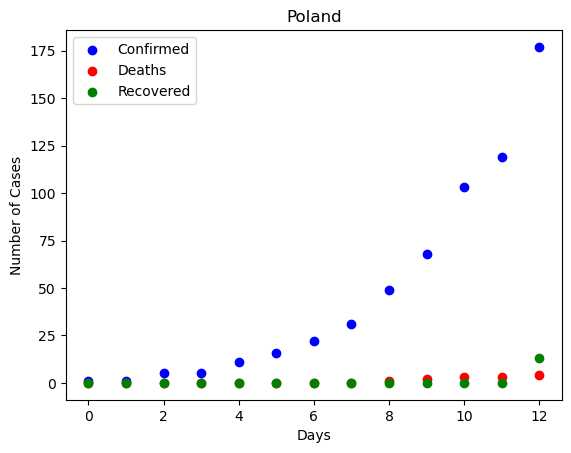

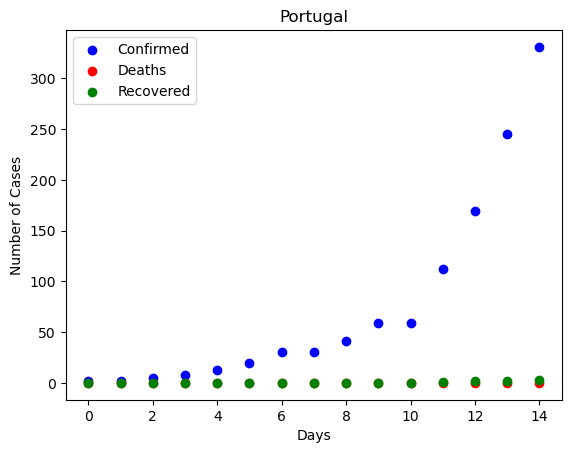

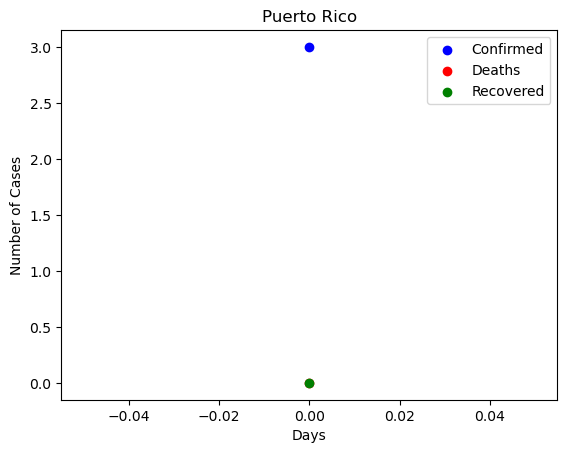

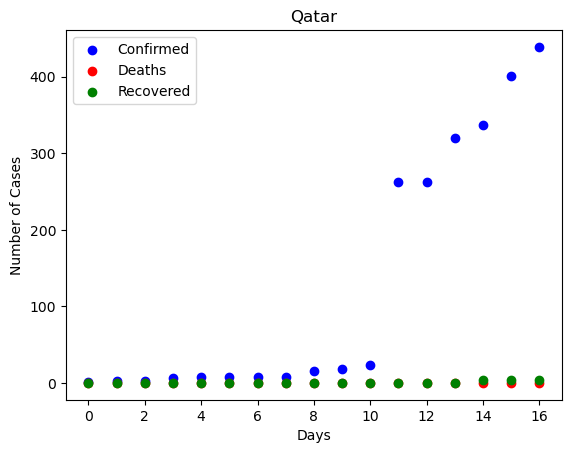

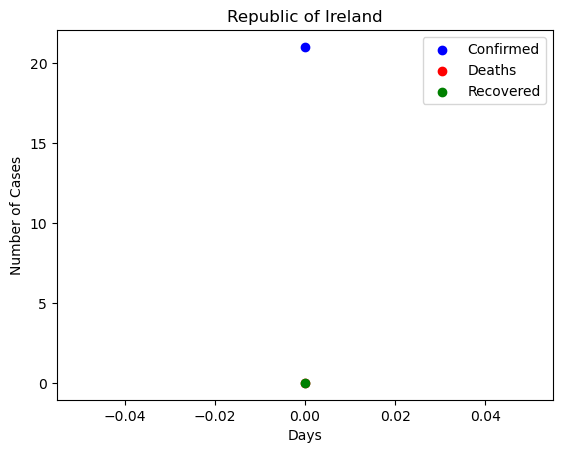

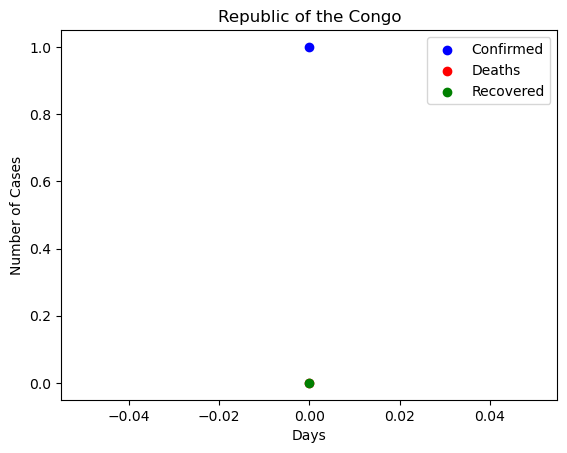

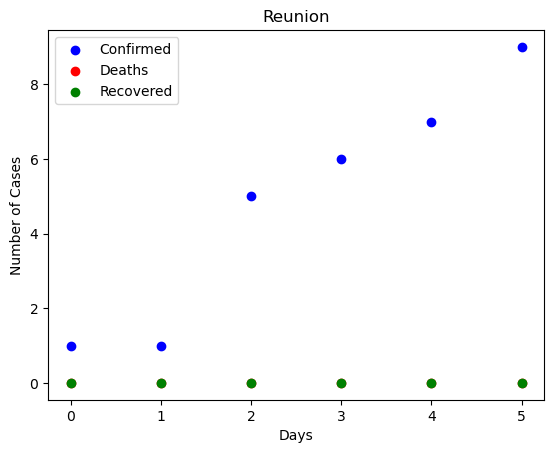

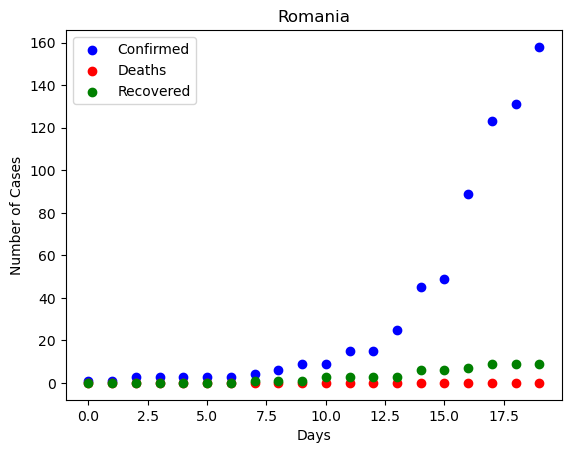

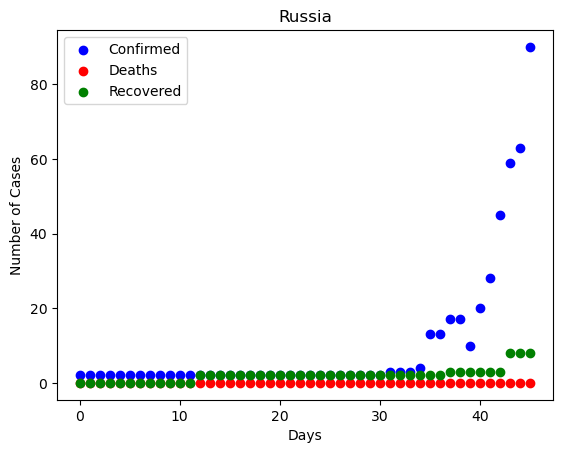

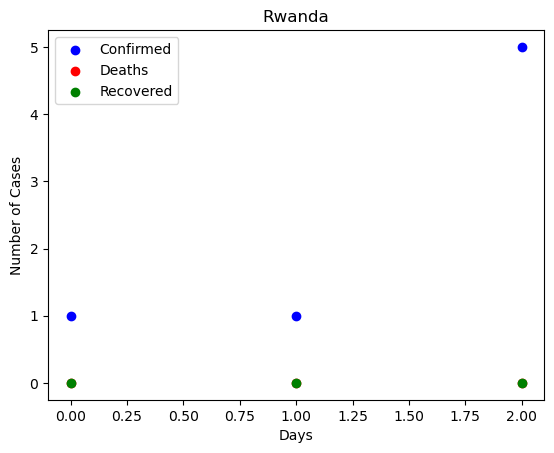

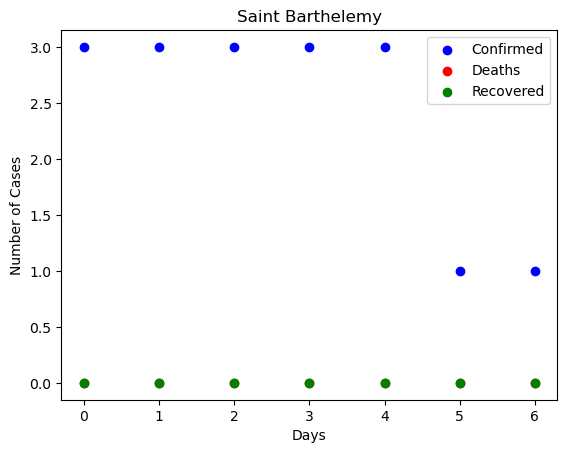

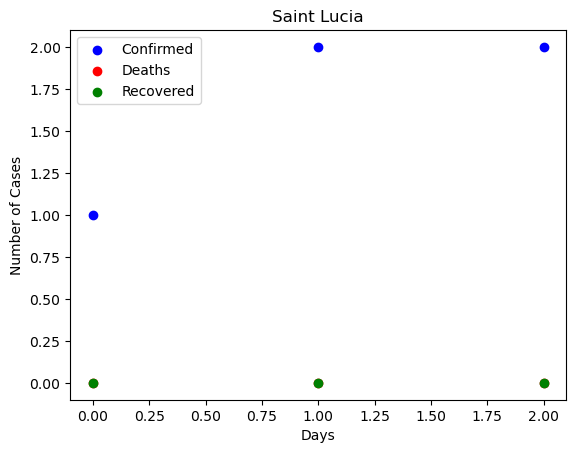

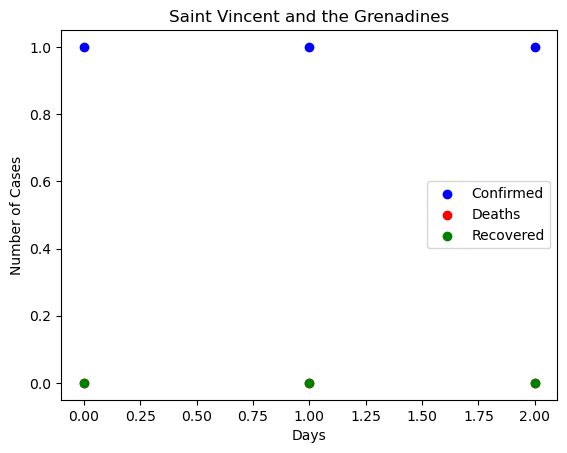

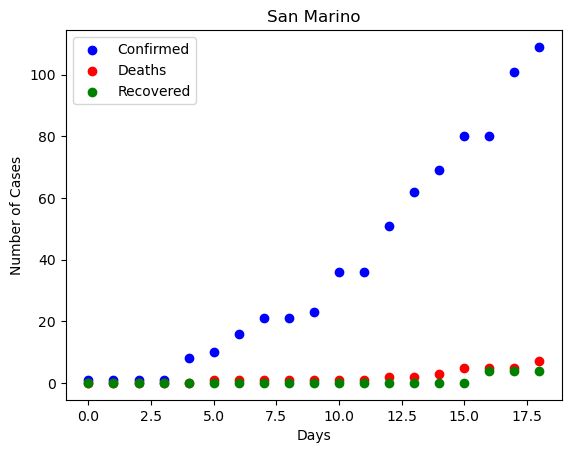

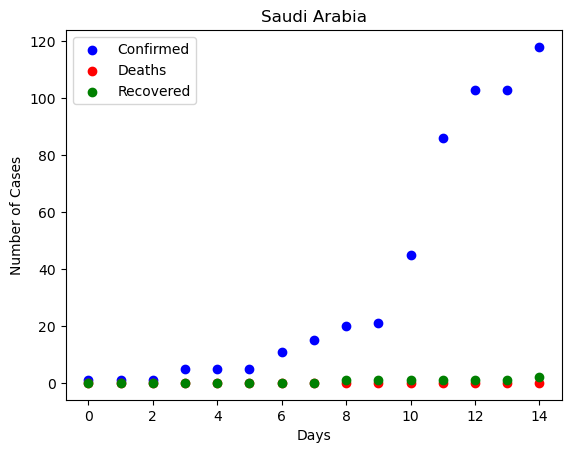

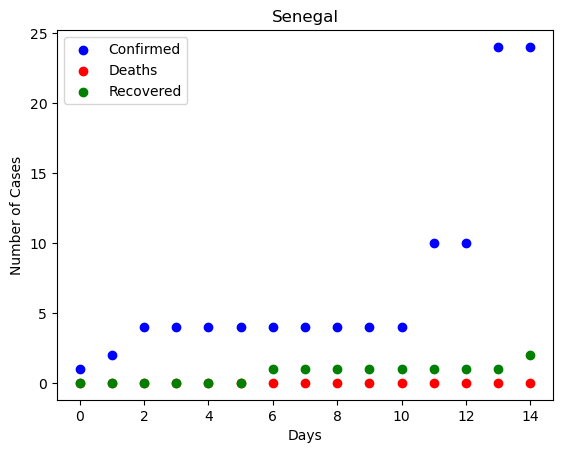

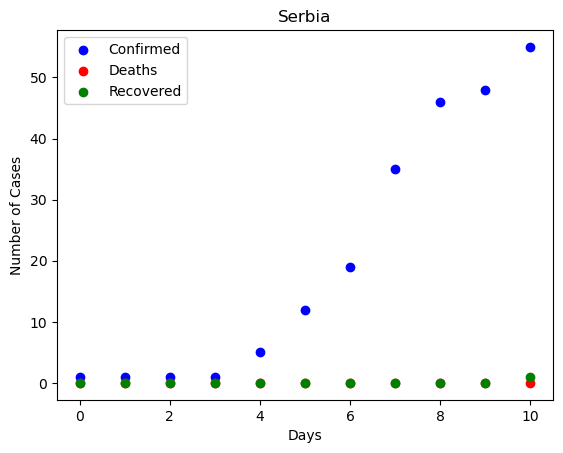

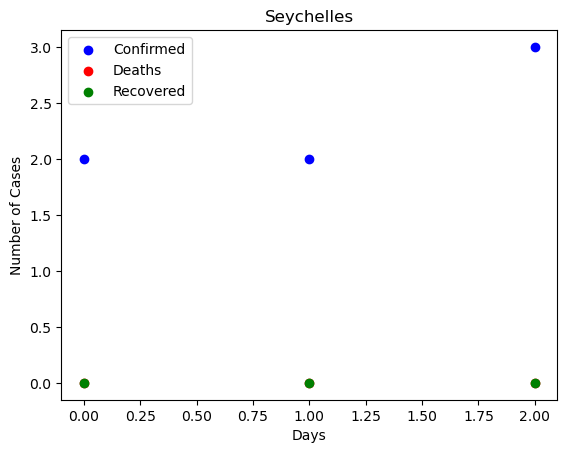

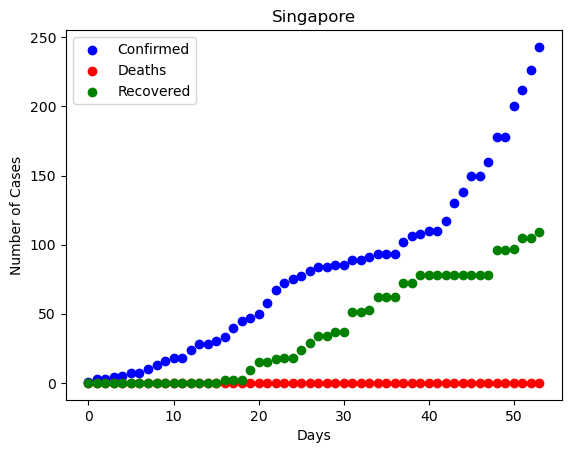

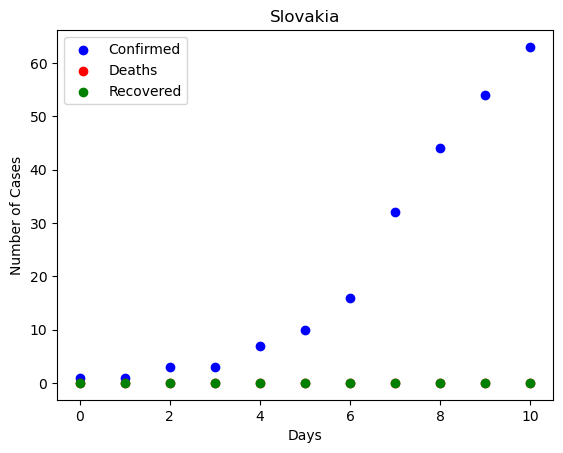

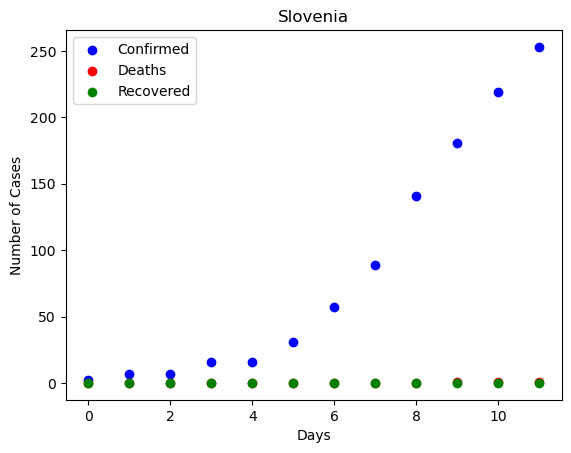

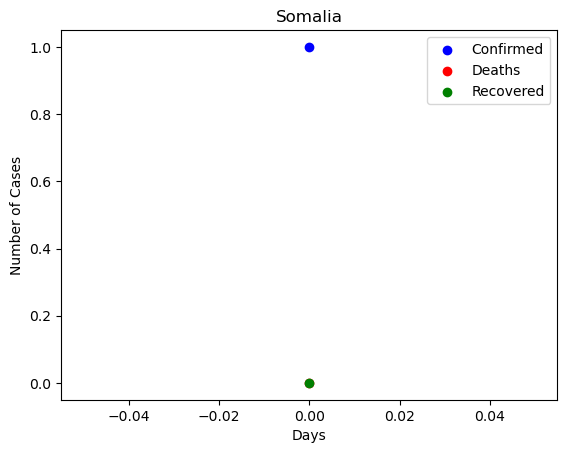

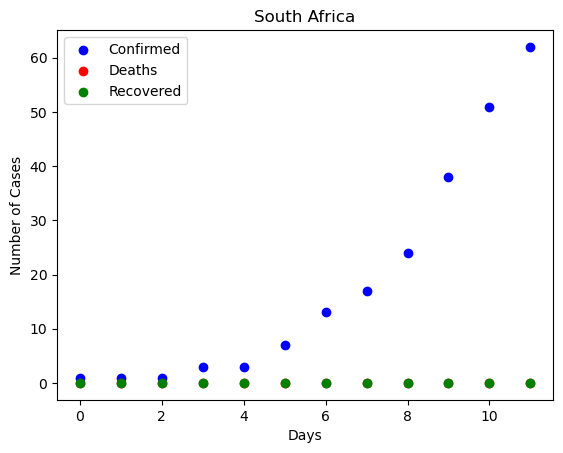

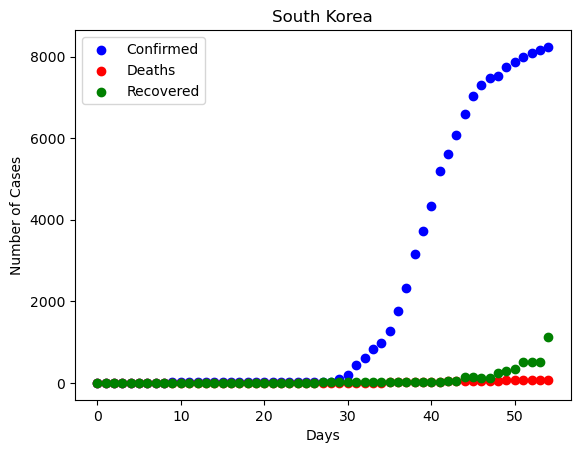

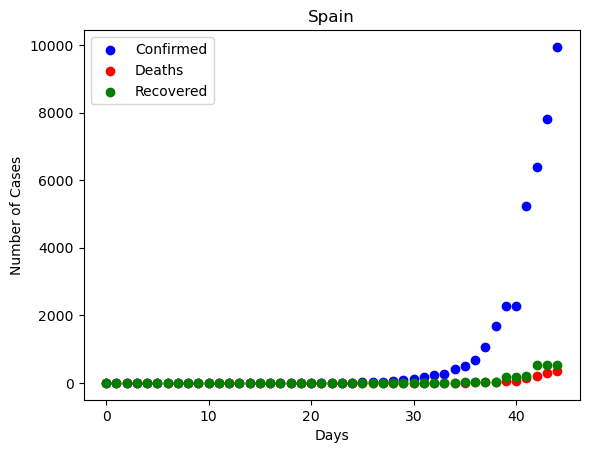

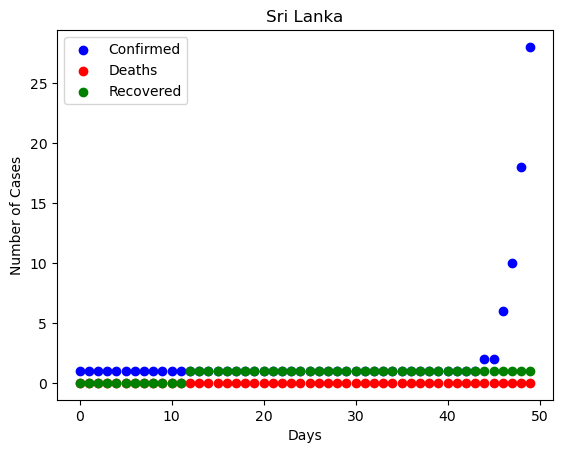

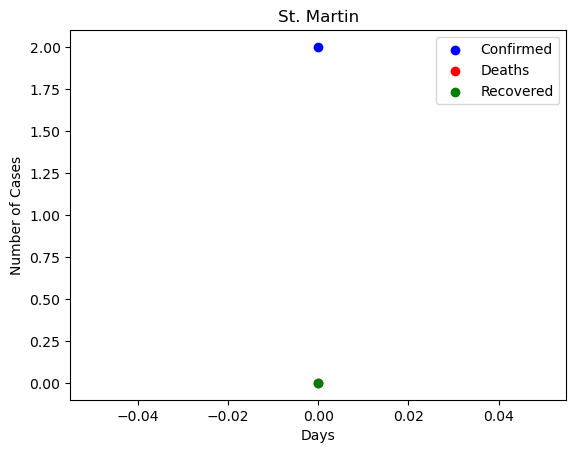

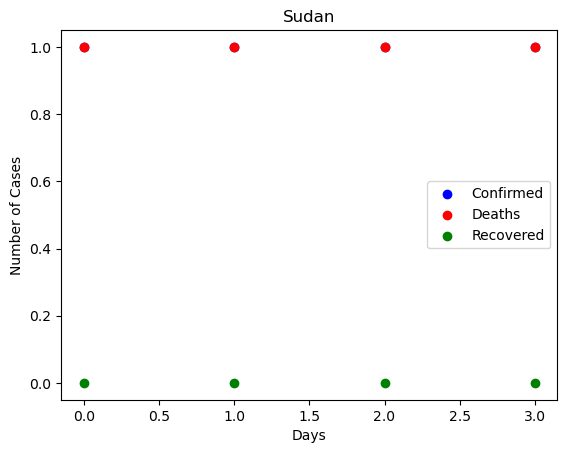

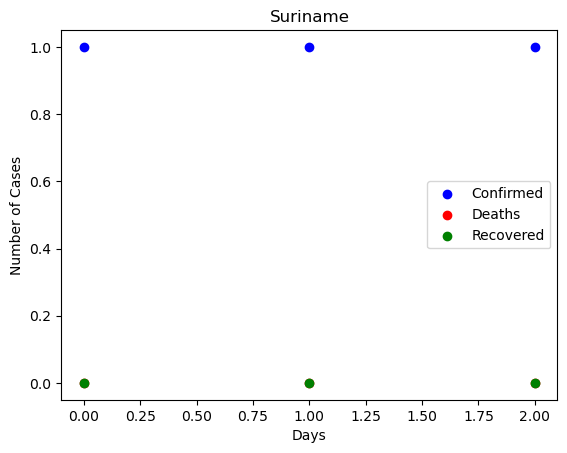

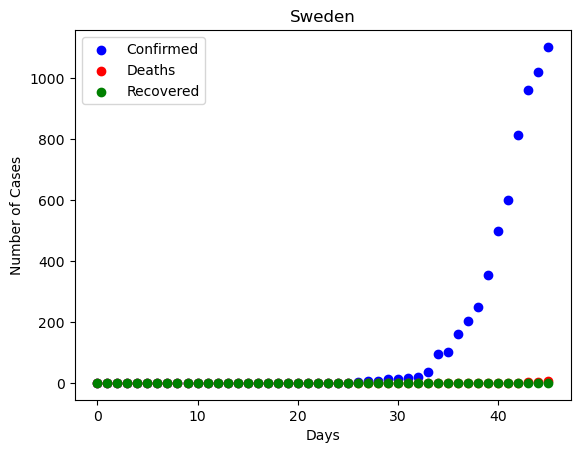

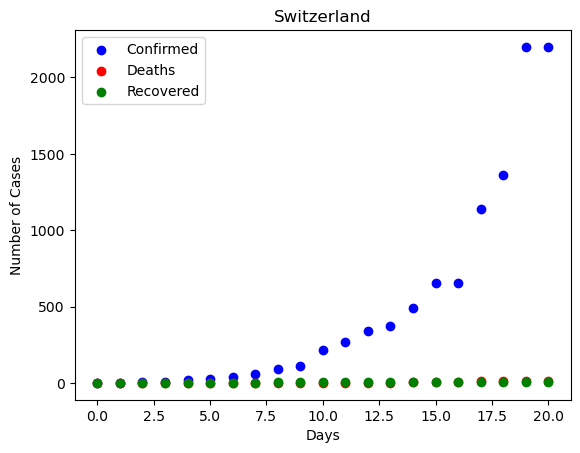

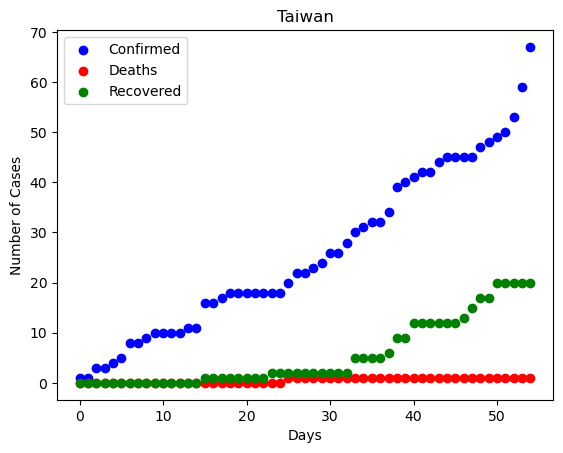

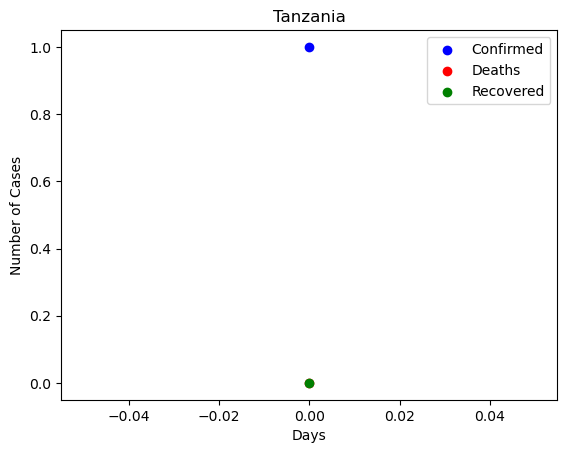

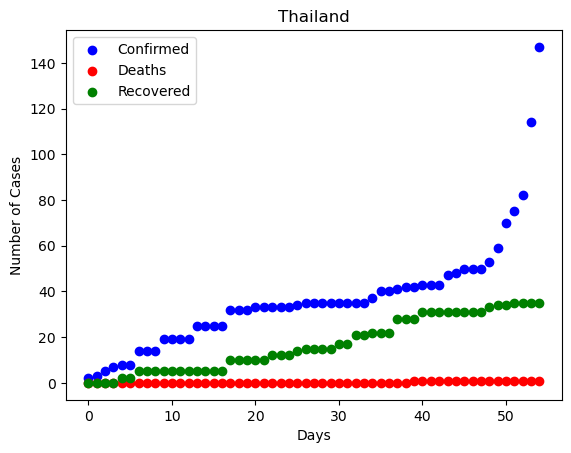

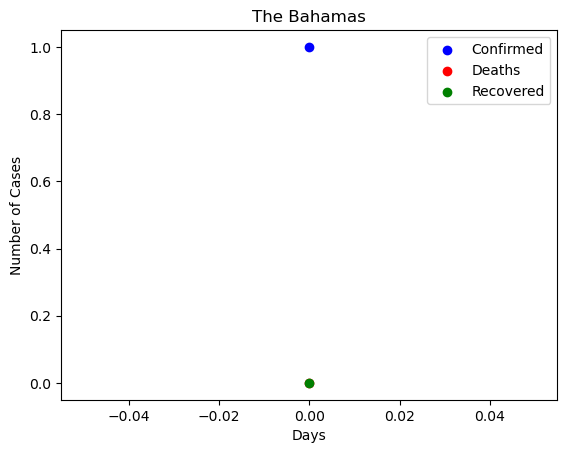

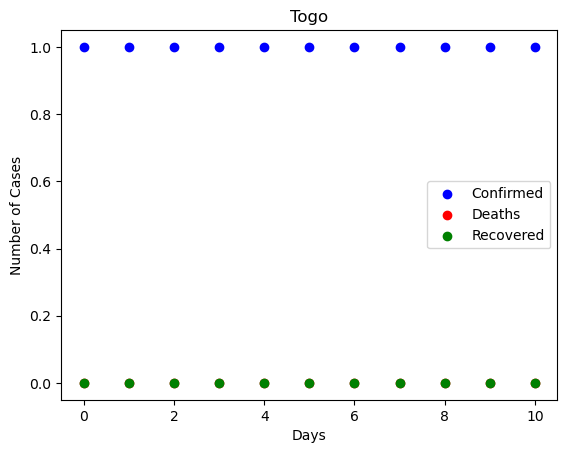

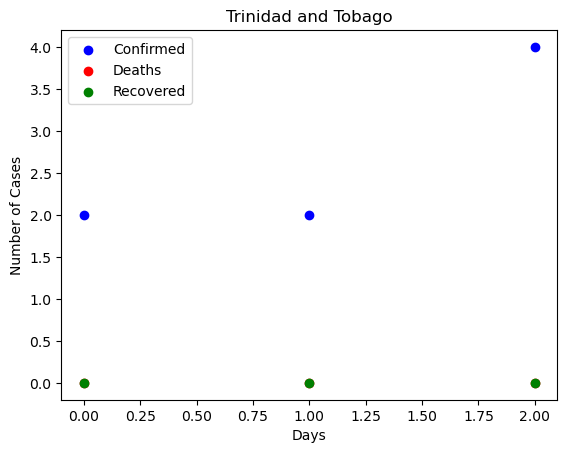

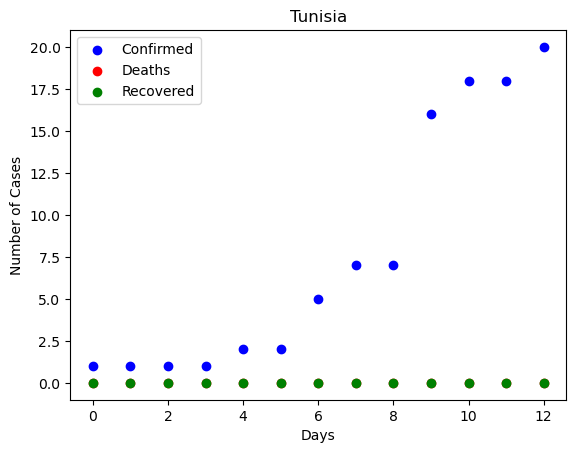

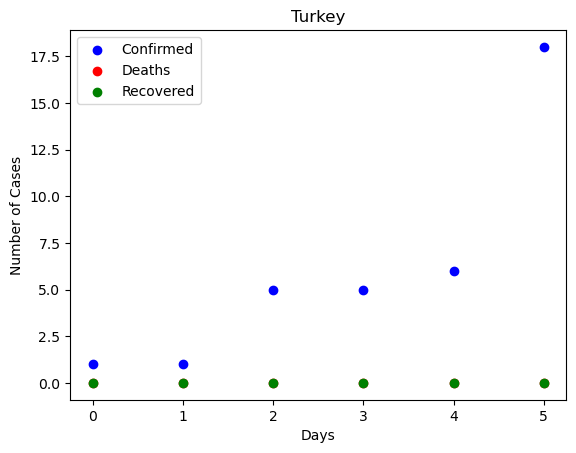

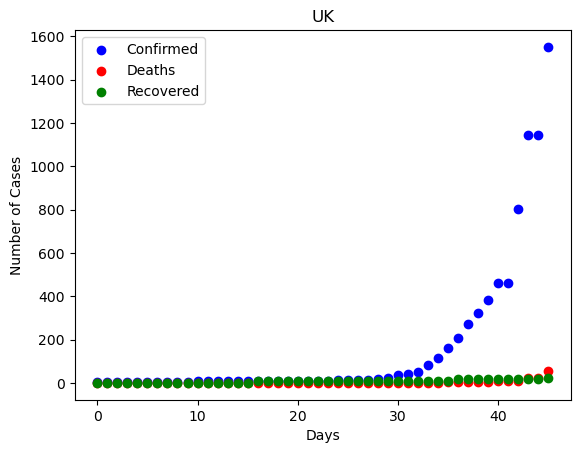

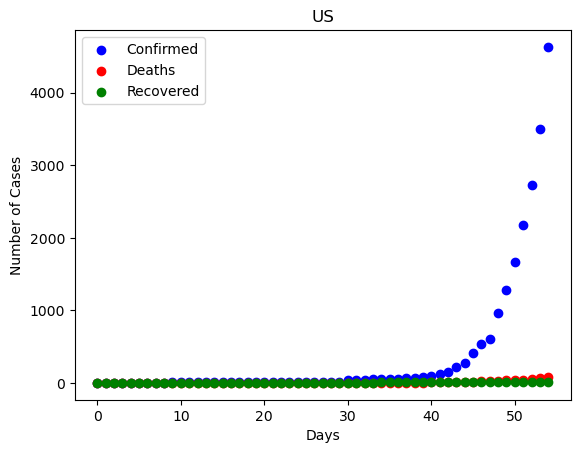

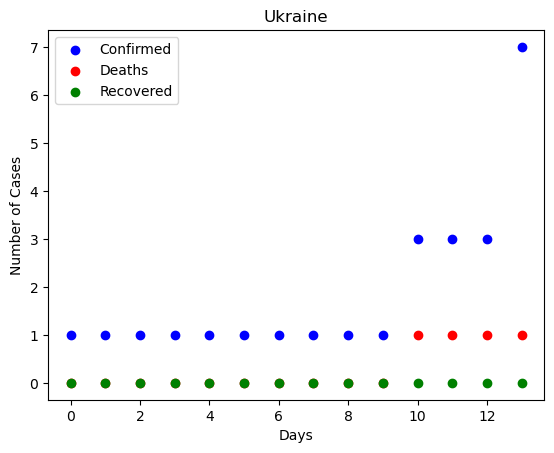

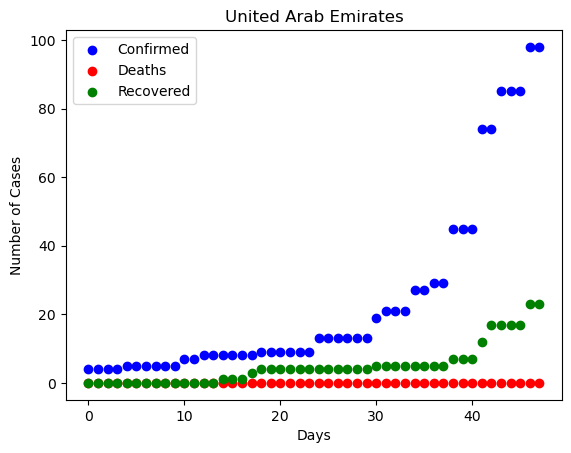

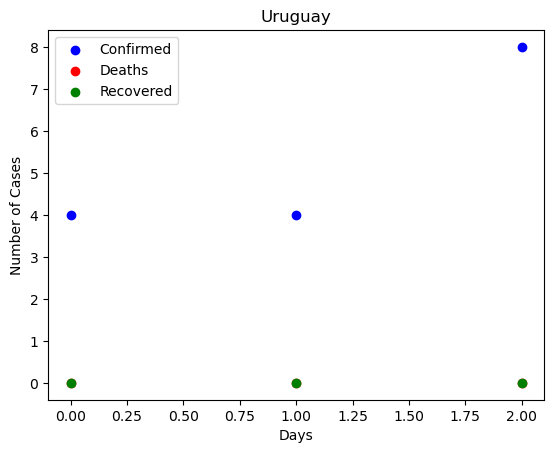

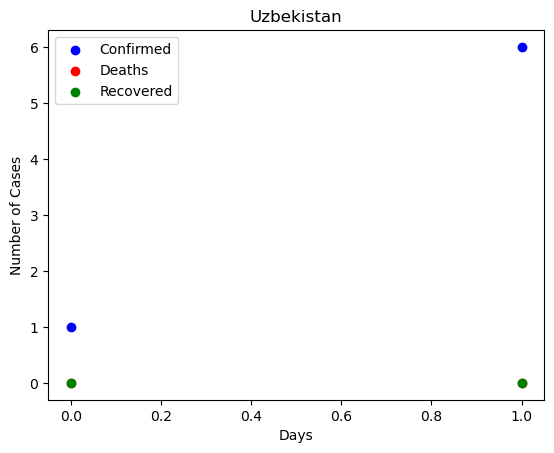

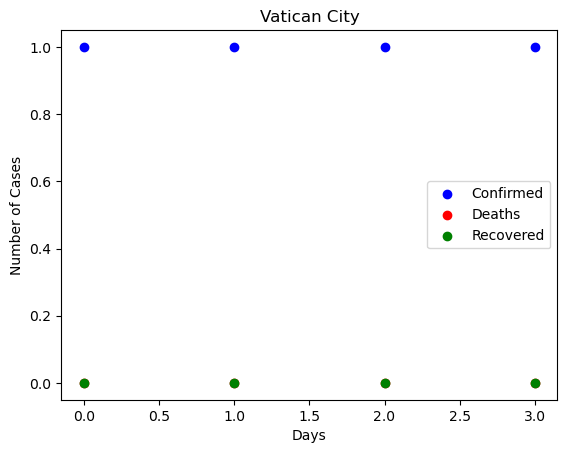

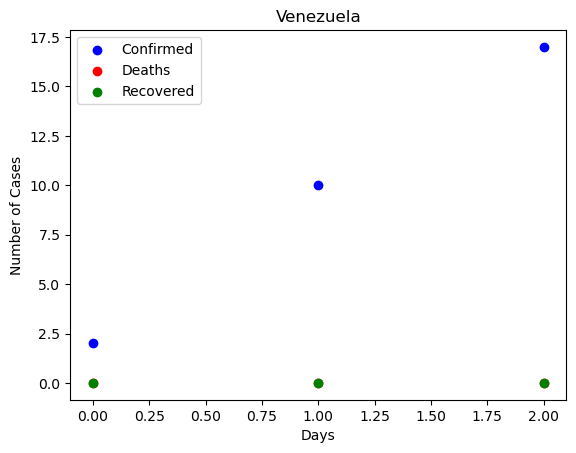

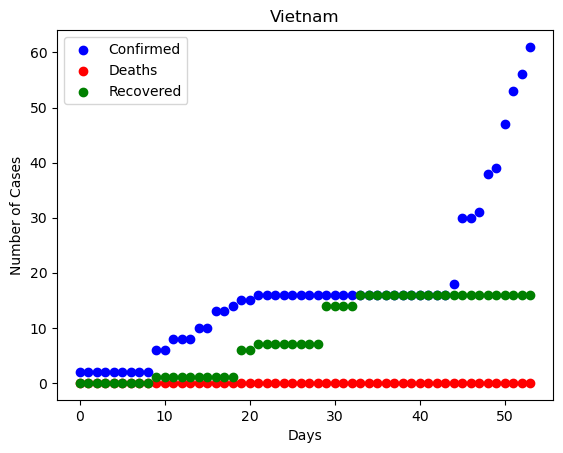

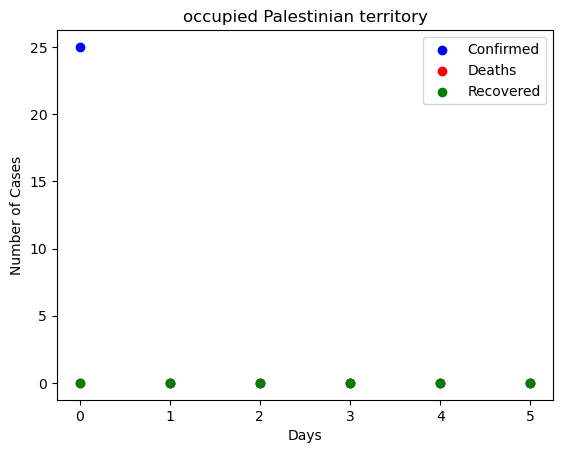

In [30]:
# plot confirmed , deaths and recovered cases for each country with country name as label 
# x axis = days y-axis = number of cases
for i in range(len(country)):
    df = df3[df3['Country']==country[i]].reset_index()
    plt.scatter(np.arange(0,len(df)),df['Confirmed'],label='Confirmed',color='blue')
    plt.scatter(np.arange(0,len(df)),df['Deaths'],label='Deaths',color='red')
    plt.scatter(np.arange(0,len(df)),df['Recovered'],label='Recovered',color='green')
    plt.xlabel('Days')
    plt.ylabel('Number of Cases')
    plt.title(country[i])
    # plt.xlim(0,0)
    plt.legend()
    plt.show()

In [31]:
# groupby date fields would be confirmed, deaths and Recovered
df4 = df3.groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()

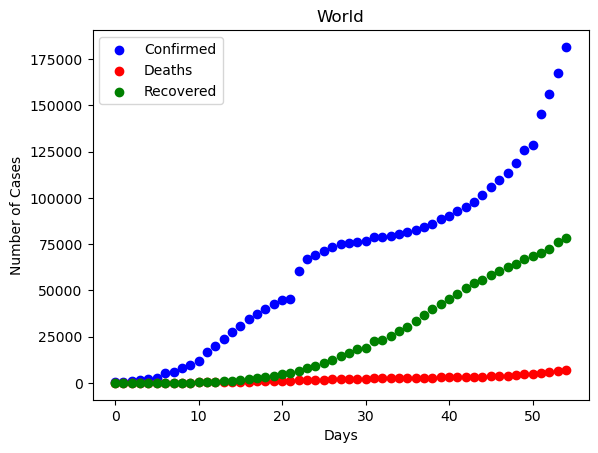

In [33]:
# plot the overall trend in the world
plt.scatter(np.arange(0,len(df4)),df4['Confirmed'],label='Confirmed',color='blue')
plt.scatter(np.arange(0,len(df4)),df4['Deaths'],label='Deaths',color='red')
plt.scatter(np.arange(0,len(df4)),df4['Recovered'],label='Recovered',color='green')
plt.xlabel('Days')
plt.ylabel('Number of Cases')
plt.title('World')
# plt.xlim(0,0)
plt.legend()
plt.show()